# Tarea 1 INF 395

Para las tareas se utilizará `Keras`, una libreria de Deep Learning de alto nivel para Python, con el reciente anuncio de Keras Core, uno puede escoger el backend de su preferencia, ya sea Pytorch, Tensorflow o JAX.

Para más Información pueden revisar la documentación oficial de Keras: https://keras.io/

In [1]:
#Para utilizar keras-core primero hay que instalar tensorflow o pytorch o jax
#pip install tensorflow
!pip install tensorflow

# una vez instalado nuestro backend podemos instalar keras-core
#Se recomienda correr el jupyter notebook en colab, ya que tiene acceso gratis a GPUS y también tiene ya instalado tensorflow, pytorch y jax, solo hace falta instalar keras-core.
!pip install -q keras-core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 924.6/924.6 kB 5.5 MB/s eta 0:00:00


## Integrantes:

* Nombre: David Ignacio Álvarez Rojas
* Nombre: Kevin Andrés Vega Olivas

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns

# Aquí se escoge el backend de keras
os.environ["KERAS_BACKEND"] = "tensorflow" # 'torch', 'tensorflow', 'jax'

import keras_core as keras

SEED = 42
keras.utils.set_random_seed(SEED)

Using TensorFlow backend


## Helper Functions

In [3]:
def viz_imgs(imgs, labels):
  "Función para visualizar imágenes junto a sus labels"
  plt.figure(figsize=(10,10))
  random_inds = np.random.choice(imgs.shape[0],36)
  for i in range(36):
      plt.subplot(6,6,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      image_ind = random_inds[i]
      plt.imshow(np.squeeze(imgs[image_ind]), cmap=plt.cm.binary)
      plt.xlabel(labels[image_ind])

In [4]:
def plot_losses(history, loss):
  "Función para graficar la función de pérdida del modelo"
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Error Graph')
  plt.ylabel(loss.name)
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [5]:
def plot_cm(y_pred, y_test):
  "Función para graficar matriz de confusión"
  cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
  cm_display = ConfusionMatrixDisplay(cm).plot()

## Parte 1: Demostración del uso de Keras

### 1.1 Mnist

Mnist es un dataset de imágenes de dígitos escritos a mano. Cada imagen es de 28x28 pixeles y está en escala de grises. El dataset está dividido en 60.000 imágenes de entrenamiento y 10.000 imágenes de testeo.

In [ ]:
#Cargamos el Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

#### Exploración de los Datos

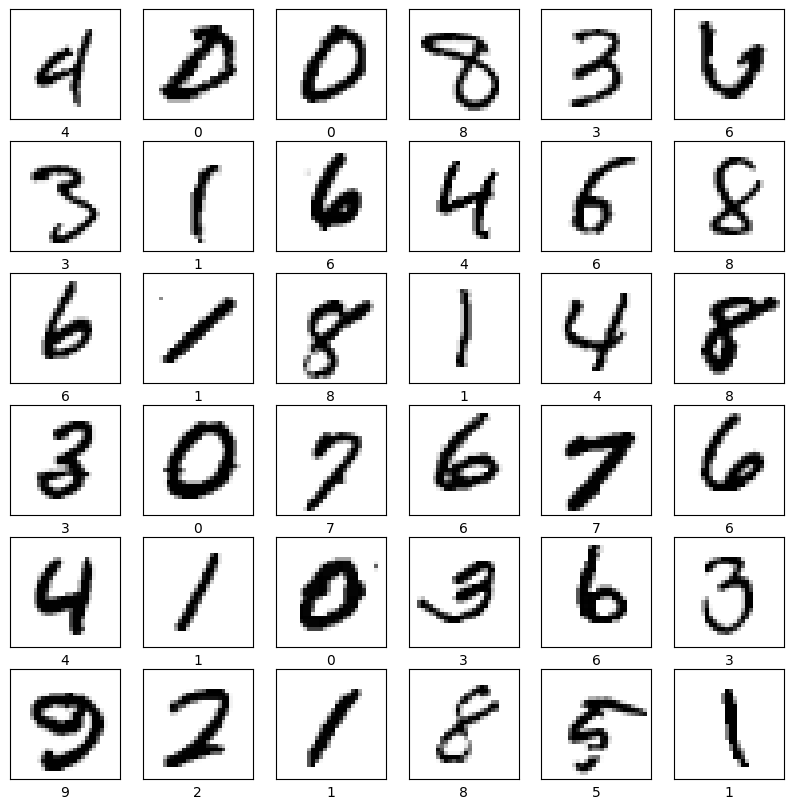

In [ ]:
# Visualizamos algunas imágenes y sus clases
viz_imgs(x_train, y_train)

In [ ]:
#Descripción de los datos
num_classes = len(np.unique(y_train))
input_shape = x_train.shape[1:]

print('cantidad de clases:', num_classes)
print('Dimension de los datos:', input_shape)

cantidad de clases: 10
Dimension de los datos: (28, 28)


#### One Hot Encoding

In [ ]:
# convertimos los vectores de clases a matrices binarias
print('antes:\n',y_train)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('\nDespues:\n',y_train)

antes:
 [5 0 4 ... 5 6 8]

Despues:
 [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


#### Arquitectura de la red

In [ ]:
#Un modelo simple de redes neuronales FeedForward
inputs = keras.Input(shape=input_shape)
x = keras.layers.Flatten()(inputs)
x =  keras.layers.Dense(128, activation='relu')(x)
outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)            │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 784)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 128)               │    100,480 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 10)                │      1,290 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

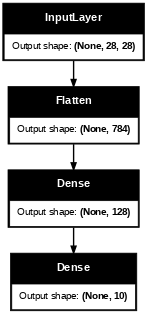

In [ ]:
keras.utils.plot_model(model, show_shapes=True, rankdir="TB", dpi=50)

#### Definición de hiperparámetros

In [ ]:
# definimos algunos hiperparámetros
batch_size = 128        #cantidad de imágenes por batch
epochs = 20             #cantidad de epochs
validation_split = 0.2  #Porcentaje de data destinada a validación

In [ ]:
#compilamos nuestro modelo, agregando la función de pérdida, el optimizador y las métricas
loss= keras.losses.CategoricalCrossentropy()
optimizer= keras.optimizers.SGD(learning_rate=1e-3)
metrics=["accuracy"]

model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

#### Entrenamiento del Modelo

In [ ]:
#Entrenamos nuestro modelo
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=validation_split,
                    verbose=1)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6077 - loss: 17.2967 - val_accuracy: 0.7898 - val_loss: 1.0557
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7962 - loss: 0.9616 - val_accuracy: 0.8378 - val_loss: 0.7853
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8409 - loss: 0.6901 - val_accuracy: 0.8591 - val_loss: 0.6569
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8647 - loss: 0.5500 - val_accuracy: 0.8724 - val_loss: 0.5855
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8799 - loss: 0.4683 - val_accuracy: 0.8839 - val_loss: 0.5360
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8914 - loss: 0.4117 - val_accuracy: 0.8911 - val_loss: 0.5022
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9014 - loss: 0.3691 - val_accuracy: 0.8976 - val_loss: 0.4756
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9085 - loss: 0.3359 - val_accuracy: 0

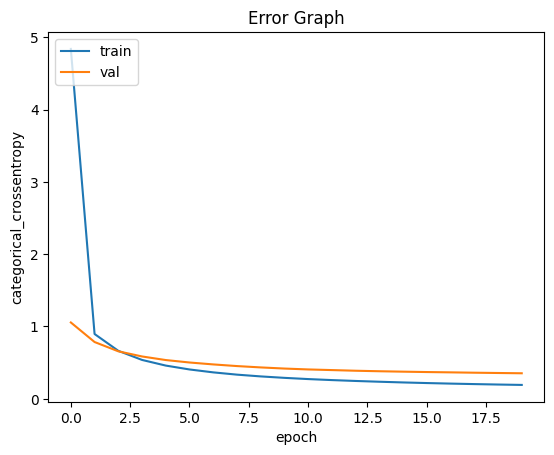

In [ ]:
plot_losses(history, loss)

#### Evaluación del Modelo

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.36804887652397156
Test accuracy: 0.9214000105857849


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


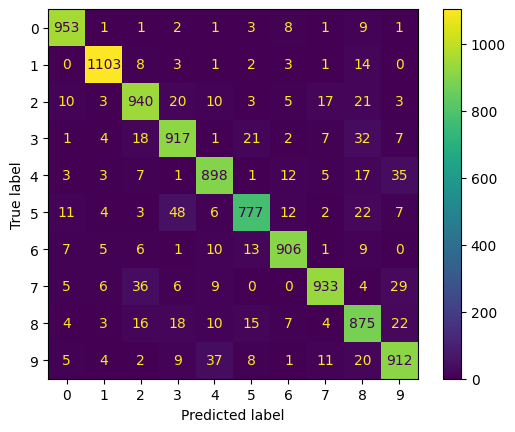

In [ ]:
# Graficamos la matriz de confusión
y_pred = model.predict(x_test)

plot_cm(y_pred, y_test)

### 1.2.1 Cifar10

Cifar10 es un dataset de imágenes de 32x32 pixeles, que contiene 10 clases distintas. Este dataset es muy utilizado para probar algoritmos de clasificación de imágenes. En este caso, utilizaremos una versión reducida de este dataset, que contiene 50000 imágenes de entrenamiento y 10000 imágenes de testeo, con 100 imágenes por clase. Las clases son: 'avión', 'automóvil', 'pájaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco' y 'camión'.

In [ ]:
#Cargamos el Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


In [ ]:
#Visualizamos si el dataset es balanceado o no.
pd.value_counts(pd.Series(y_train.reshape(-1)))

6    5000
9    5000
4    5000
1    5000
2    5000
7    5000
8    5000
3    5000
5    5000
0    5000
dtype: int64

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


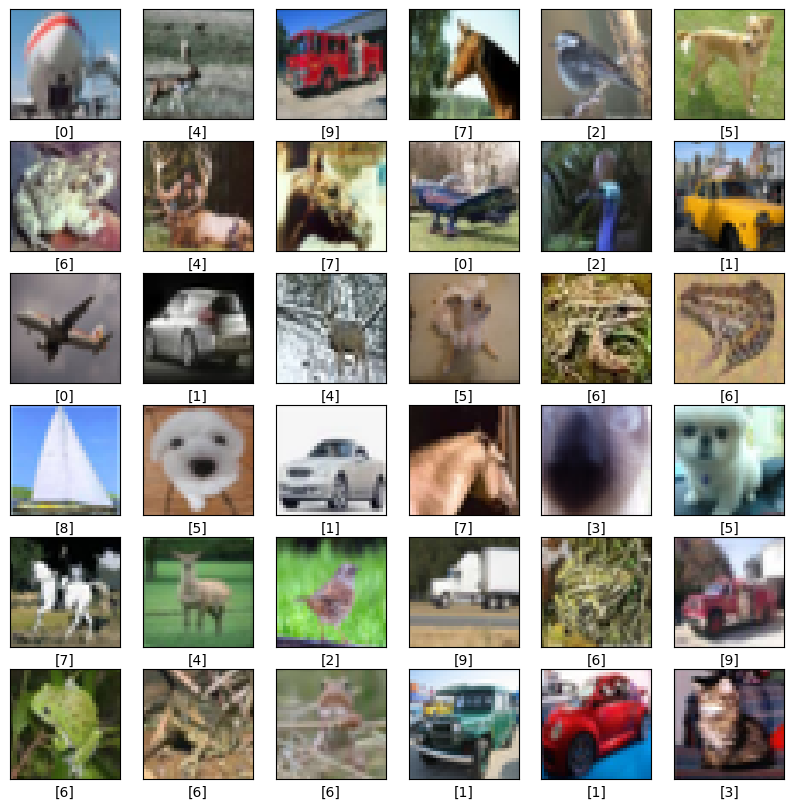

In [ ]:
# Visualizamos algunas imágenes y sus clases
viz_imgs(x_train, y_train)

In [ ]:
#Descripción de los datos
num_classes = len(np.unique(y_train))
input_shape = x_train.shape[1:]

print('cantidad de imágenes:',x_train.shape[0])
print('Dimensión de los datos:',input_shape)
print('Tipo de Datos:',x_train.dtype)
print('cantidad de clases:', num_classes)

cantidad de imágenes: 50000
Dimensión de los datos: (32, 32, 3)
Tipo de Datos: uint8
cantidad de clases: 10


In [ ]:
# convertimos los vectores de clases a matrices binarias
print('antes:\n',y_train)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('\nDespues:\n',y_train)

antes:
 [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]

Despues:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
#Un modelo simple de redes neuronales FeedForward
inputs = keras.Input(shape=input_shape)
x = keras.layers.Flatten()(inputs)
x =  keras.layers.Dense(128, activation='relu')(x)
outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_1 (Flatten)             │ (None, 3072)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 128)               │    393,344 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_3 (Dense)                 │ (None, 10)                │      1,290 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

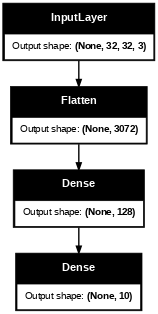

In [ ]:
keras.utils.plot_model(model, show_shapes=True, rankdir="TB", dpi=50)

In [ ]:
# definimos algunos hiperparámetros
batch_size = 128
epochs = 20
validation_split = 0.2

In [ ]:
#compilamos nuestro modelo, agregando la función de pérdida, el optimizador y las métricas
loss= keras.losses.CategoricalCrossentropy()
optimizer= keras.optimizers.SGD(learning_rate=1e-3)
metrics=["accuracy"]

model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
#Entrenamos nuestro modelo
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=validation_split,
                    verbose=1)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.1021 - loss: 582.5864 - val_accuracy: 0.0953 - val_loss: 2.3144
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.1018 - loss: 2.3032 - val_accuracy: 0.0953 - val_loss: 2.3126
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.1017 - loss: 2.3021 - val_accuracy: 0.0954 - val_loss: 2.3128
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.1019 - loss: 2.3018 - val_accuracy: 0.0954 - val_loss: 2.3130
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1019 - loss: 2.3017 - val_accuracy: 0.0954 - val_loss: 2.3131
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1019 - loss: 2.3017 - val_accuracy: 0.0954 - val_loss: 2.3131
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1019 - loss: 2.3017 - val_accuracy: 0.0954 - val_loss: 2.3125
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.1019 - loss: 2.3017 - val_a

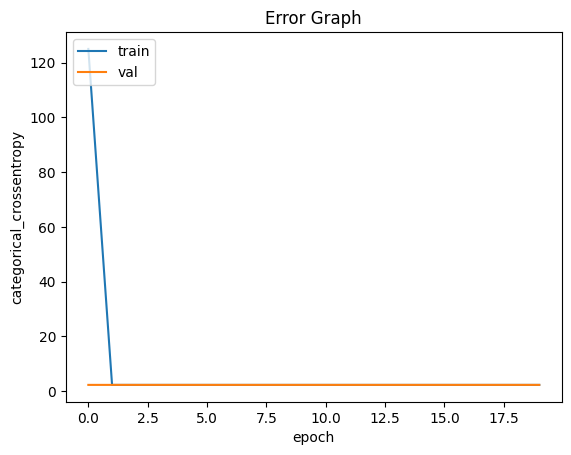

In [ ]:
plot_losses(history, loss)

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 2.309175729751587
Test accuracy: 0.09969999641180038


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


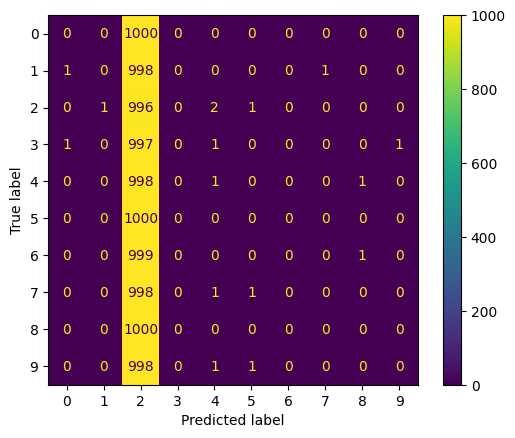

In [ ]:
# Graficamos la matriz de confusión
y_pred = model.predict(x_test)

plot_cm(y_pred, y_test)

In [ ]:
# Comparamos otras métricas de clasificación como la precisión, recall y f1-score
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']

print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00      1000
     class 1       0.00      0.00      0.00      1000
     class 2       0.10      1.00      0.18      1000
     class 3       0.00      0.00      0.00      1000
     class 4       0.17      0.00      0.00      1000
     class 5       0.00      0.00      0.00      1000
     class 6       0.00      0.00      0.00      1000
     class 7       0.00      0.00      0.00      1000
     class 8       0.00      0.00      0.00      1000
     class 9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.03      0.10      0.02     10000
weighted avg       0.03      0.10      0.02     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Podemos observar como este simple modelo de redes neuronales no es lo suficientemente capaz de clasificar las imágenes, de hecho les asigna el mismo label a todas las imágenes.

Es por esto que saltan los warnings, porque al calcular f1, recall y precisión, no hay datos para las otras clases.

Ahora vamos a ver como podemos mejorar nuestro modelo.

### 1.2.2 Mejorando el Modelo

In [ ]:
#Es una práctica común en modelos de machine learning escalar nuestros datos, asi nos aseguramos de que todos tengan el mismo rango, con pequeños cambios como estos nuestros modelos pueden mejorar su desempeño.

#Escalamos las imágenes entre [0,1]
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
# Agregamos capas de Dropout, inicializadores y hacemos el modelo más profundo
inputs = keras.Input(shape=input_shape)
x = keras.layers.Flatten()(inputs)
x =  keras.layers.Dense(512, activation='relu', kernel_initializer="he_normal")(x)
x = keras.layers.Dropout(0.1)(x)
x =  keras.layers.Dense(256, activation='relu', kernel_initializer="he_normal")(x)
x = keras.layers.Dropout(0.1)(x)
x =  keras.layers.Dense(128, activation='relu', kernel_initializer="he_normal")(x)
x = keras.layers.Dropout(0.1)(x)
x =  keras.layers.Dense(64, activation='relu', kernel_initializer="he_normal")(x)
x = keras.layers.Dropout(0.1)(x)
x =  keras.layers.Dense(32, activation='relu', kernel_initializer="he_normal")(x)
outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_2 (Flatten)             │ (None, 3072)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_4 (Dense)                 │ (None, 512)               │  1,573,376 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_5 (Dense)                 │ (None, 256)               │    131,328 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_6 (Dense)                 │ (None, 128)               │     32,896 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_2 (Dropout)             │ (None, 128)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_7 (Dense)                 │ (None, 64)                │      8,256 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_3 (Dropout)             │ (None, 64)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_8 (Dense)                 │ (None, 32)                │      2,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_9 (Dense)                 │ (None, 10)                │        330 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,748,266 (6.67 MB)

 Trainable params: 1,748,266 (6.67 MB)

 Non-trainable params: 0 (0.00 B)

**Explique cómo funciona la capa de Dropout dentro del modelo y por qué esta capa mejora las predicciones [3pts]**

`Respuesta:` La capa de Dropout dentro del modelo se encarga de que las neuronas aprendan mejor los datos de entrenamiento, activando y desactivando aleatoriamente algunas de las neuronas haciendo que las restantes aprendan mejor los datos de entrada.

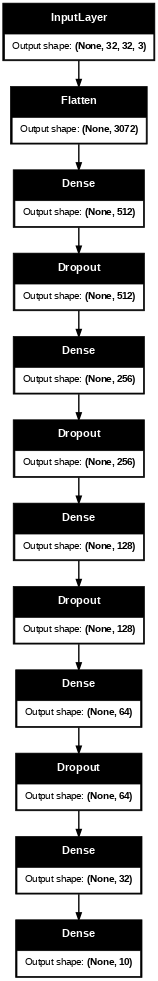

In [ ]:
keras.utils.plot_model(model, show_shapes=True, rankdir="TB", dpi=50)

In [ ]:
#Agregamos Callbacks
#Early Stopping monitorea la función de pérdida y detiene el entrenamiento cuando no hay mejora dentro de un número de épocas determinado, lo que nos ahorra tiempo de entrenamiento y también evita el sobreajuste.
my_callbacks = [
    keras.callbacks.EarlyStopping(
      monitor="val_loss",
      min_delta=0,
      patience=10,
      restore_best_weights=True #Es importante retornar los mejores pesos, por defecto viene en False asi que siempre asegurarse de ponerlo en True
    )
]

In [ ]:
#Cambiamos el Optimizador a Adam
loss= keras.losses.CategoricalCrossentropy()
optimizer= keras.optimizers.Adam(learning_rate=1e-3)
metrics=["accuracy"]

model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
# agregamos más epoochs ahora que tenemos early stopping
batch_size = 128
epochs = 200
validation_split = 0.2

In [ ]:
#Entrenamos nuestro modelo
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=validation_split,
                    verbose=1,
                    callbacks=my_callbacks
                    )

Epoch 1/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.1522 - loss: 2.2538 - val_accuracy: 0.2780 - val_loss: 1.9424
Epoch 2/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.2820 - loss: 1.9253 - val_accuracy: 0.3346 - val_loss: 1.8397
Epoch 3/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.3309 - loss: 1.8386 - val_accuracy: 0.3740 - val_loss: 1.7458
Epoch 4/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.3496 - loss: 1.7868 - val_accuracy: 0.3818 - val_loss: 1.7293
Epoch 5/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.3717 - loss: 1.7401 - val_accuracy: 0.3863 - val_loss: 1.6988
Epoch 6/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.3796 - loss: 1.7073 - val_accuracy: 0.4046 - val_loss: 1.6526
Epoch 7/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.3928 - loss: 1.6812 - val_accuracy: 0.4050 - val_loss: 1.6518
Epoch 8/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.4018 - loss: 1

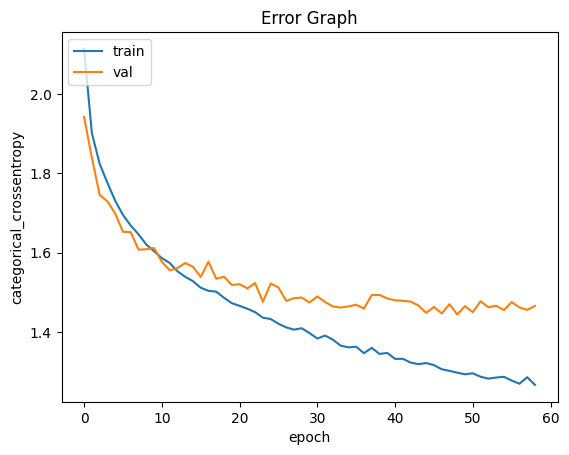

In [ ]:
plot_losses(history, loss)

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.4367214441299438
Test accuracy: 0.49050000309944153


Aún estamos con un accuracy del 0.5, eso seria equivalente a lanzar una moneda al aire y que salga cara o sello, por lo que no es un buen modelo, pero se puede mejorar.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


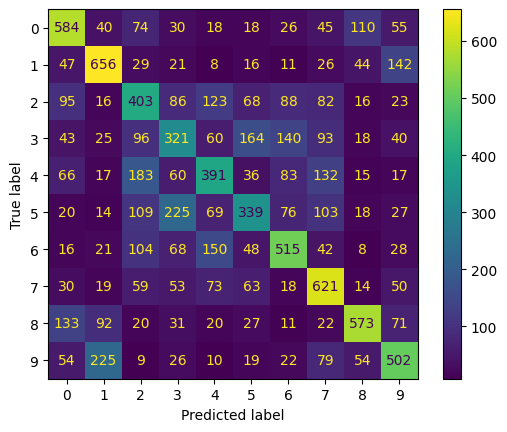

In [ ]:
y_pred = model.predict(x_test)

plot_cm(y_pred, y_test)

In [ ]:
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']

print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.54      0.58      0.56      1000
     class 1       0.58      0.66      0.62      1000
     class 2       0.37      0.40      0.39      1000
     class 3       0.35      0.32      0.33      1000
     class 4       0.42      0.39      0.41      1000
     class 5       0.42      0.34      0.38      1000
     class 6       0.52      0.52      0.52      1000
     class 7       0.50      0.62      0.55      1000
     class 8       0.66      0.57      0.61      1000
     class 9       0.53      0.50      0.51      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.49     10000
weighted avg       0.49      0.49      0.49     10000



### 1.2.3 Último Modelo ahora Con Convoluciones y Skip Connections

Keras nos permite complejizar el modelo de una manera muy sencilla, agregaremos capas convolucionales, ya que estas son muy buenas a la hora de trabajar con imágenes, también agregaremos skip connections que son conexiones que se saltan capas del modelo.

**EJEMPLO DE SKIP CONNECTION**

<img src="https://theaisummer.com/static/8d19d048cd68d6dce362e025cf3b635a/1ac66/skip-connection.png">

**¿Qué problema resuelven las Skip Connections y como lo hacen? [3pts]**

`Respuesta:`  Las Skip Connections son un tipo de conexión que permiten que la **información fluya de forma directa** entre dos capas, saltándose los procesamientos de las capas intermedias. Este tipo de conexiones resuelven el problema del **desvanecimiento del gradiente**, lo que facilita el entrenamiento de modelos más profundos y mejora el rendimiento.

La idea de este tipo de conexiones es permitir que la **información generada en la capa origen se combine con la información generada por las capas intermedias** entre ella y la capa destino de la conexión, lo que permite que los gradientes se propaguen, evitando la degradación del rendimiento en la red.

In [ ]:
# Agregamos capas de Dropout, inicializadores y hacemos el modelo más profundo
inputs = keras.Input(shape=input_shape)
x_1 = keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', kernel_initializer="he_normal")(inputs)
x_1 = keras.layers.BatchNormalization()(x_1)
x_1 = keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', kernel_initializer="he_normal")(x_1)
x_1 = keras.layers.BatchNormalization()(x_1)
x_1 = keras.layers.MaxPooling2D(pool_size=(2,2))(x_1)
x_1 = keras.layers.Dropout(0.2)(x_1)
flatten_x1 = keras.layers.Flatten()(x_1)

x_2 = keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', kernel_initializer="he_normal")(x_1)
x_2 = keras.layers.BatchNormalization()(x_2)
x_2 = keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', kernel_initializer="he_normal")(x_2)
x_2 = keras.layers.BatchNormalization()(x_2)
x_2 = keras.layers.MaxPooling2D(pool_size=(2,2))(x_2)
x_2 = keras.layers.Dropout(0.2)(x_2)
flatten_x2 = keras.layers.Flatten()(x_2)

x_3 = keras.layers.Conv2D(128, (3,3), padding='same', activation='relu', kernel_initializer="he_normal")(x_2)
x_3 = keras.layers.BatchNormalization()(x_3)
x_3 = keras.layers.Conv2D(128, (3,3), padding='same', activation='relu', kernel_initializer="he_normal")(x_3)
x_3 = keras.layers.BatchNormalization()(x_3)
x_3 = keras.layers.MaxPooling2D(pool_size=(2,2))(x_3)
x_3 = keras.layers.Dropout(0.2)(x_3)
flatten_x3 = keras.layers.Flatten()(x_3)

z = keras.layers.concatenate([flatten_x1, flatten_x2])
z = keras.layers.concatenate([z, flatten_x3])

z =  keras.layers.Dense(512, activation='relu', kernel_initializer="he_normal")(z)
z = keras.layers.Dropout(0.1)(z)
z =  keras.layers.Dense(256, activation='relu', kernel_initializer="he_normal")(z)
z = keras.layers.Dropout(0.1)(z)
z =  keras.layers.Dense(128, activation='relu', kernel_initializer="he_normal")(z)
z = keras.layers.Dropout(0.1)(z)
z =  keras.layers.Dense(64, activation='relu', kernel_initializer="he_normal")(z)
z = keras.layers.Dropout(0.1)(z)
z =  keras.layers.Dense(32, activation='relu', kernel_initializer="he_normal")(z)
outputs = keras.layers.Dense(num_classes, activation='softmax')(z)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃ Param # ┃ Connected to         ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 32, 32, 3) │       0 │ -                    │
│ (InputLayer)        │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2d (Conv2D)     │ (None, 32, 32,    │     896 │ input_layer_3[0][0]  │
│                     │ 32)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ batch_normalization │ (None, 32, 32,    │     128 │ conv2d[0][0]         │
│ (BatchNormalizatio… │ 32)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 32, 32,    │   9,248 │ batch_normalization… │
│                     │ 32)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │     128 │ conv2d_1[0][0]       │
│ (BatchNormalizatio… │ 32)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ max_pooling2d       │ (None, 16, 16,    │       0 │ batch_normalization… │
│ (MaxPooling2D)      │ 32)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ dropout_4 (Dropout) │ (None, 16, 16,    │       0 │ max_pooling2d[0][0]  │
│                     │ 32)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 16, 16,    │  18,496 │ dropout_4[0][0]      │
│                     │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │     256 │ conv2d_2[0][0]       │
│ (BatchNormalizatio… │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 16, 16,    │  36,928 │ batch_normalization… │
│                     │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │     256 │ conv2d_3[0][0]       │
│ (BatchNormalizatio… │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ max_pooling2d_1     │ (None, 8, 8, 64)  │       0 │ batch_normalization… │
│ (MaxPooling2D)      │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ dropout_5 (Dropout) │ (None, 8, 8, 64)  │       0 │ max_pooling2d_1[0][… │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 8, 8, 128) │  73,856 │ dropout_5[0][0]      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 128) │     512 │ conv2d_4[0][0]       │
│ (BatchNormalizatio… │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 8, 8, 128) │ 147,584 │ batch_normalization… │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 128) │     512 │ conv2d_5[0][0]       │
│ (BatchNormalizatio… │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ max_pooling2d_2     │ (None, 4, 4, 128) │       0 │ batch_normalization

 Total params: 7,804,234 (29.77 MB)

 Trainable params: 7,803,338 (29.77 MB)

 Non-trainable params: 896 (3.50 KB)

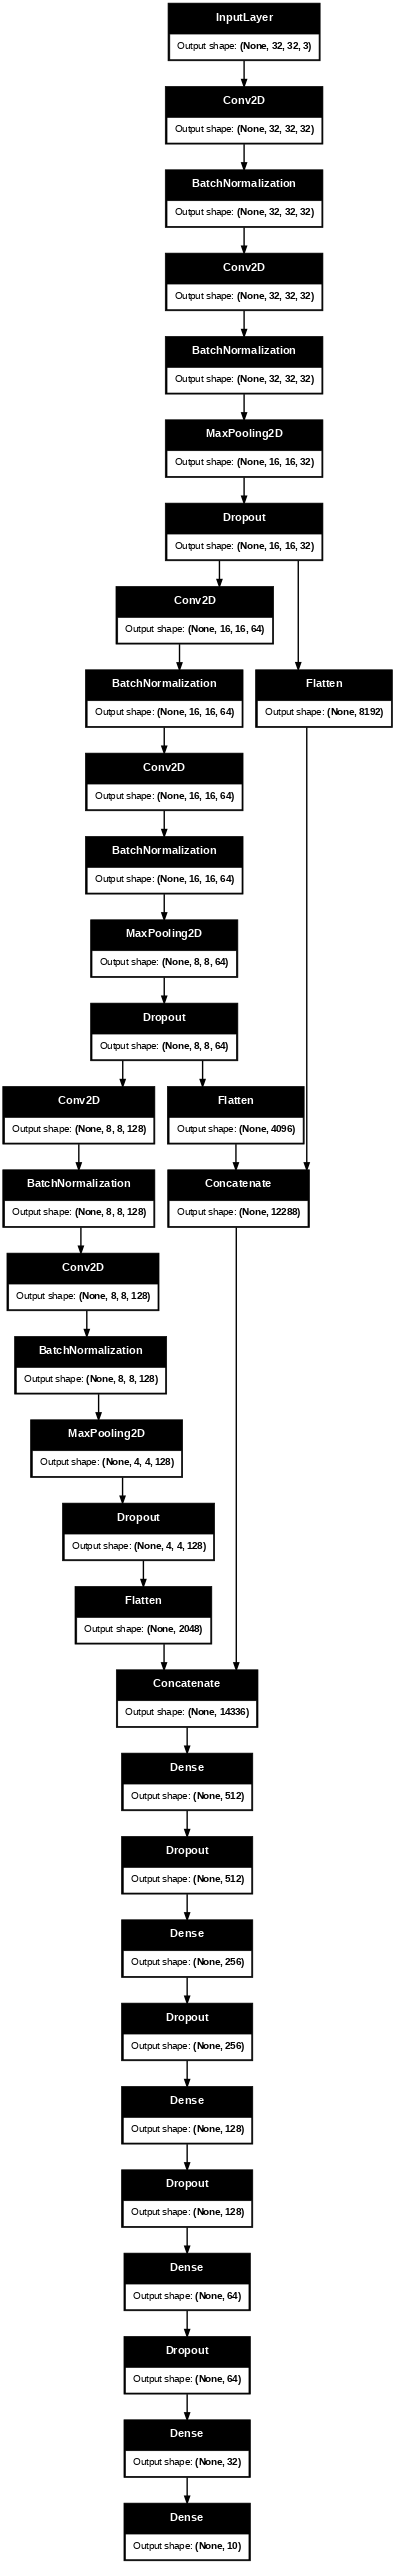

In [ ]:
keras.utils.plot_model(model, show_shapes=True, rankdir="TB", dpi=50)

In [ ]:
#Cambiamos el Optimizador a AdamW
loss= keras.losses.CategoricalCrossentropy()
optimizer= keras.optimizers.AdamW(learning_rate=1e-3)
metrics=["accuracy"]

model.compile(loss=loss, optimizer=optimizer, metrics=metrics, jit_compile=True)

In [ ]:
#Early Stopping
my_callbacks = [
    keras.callbacks.EarlyStopping(
      monitor="val_loss",
      min_delta=0,
      patience=10,
      restore_best_weights=True #Es importante retornar los mejores pesos, por defecto viene en False asi que siempre asegurarse de ponerlo en True
    )
]

In [ ]:
# Hiperparámetros
batch_size = 128
epochs = 200
validation_split = 0.2

In [ ]:
#Entrenamos nuestro modelo
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=validation_split,
                    verbose=1,
                    callbacks=my_callbacks
                    )

Epoch 1/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 768s 2s/step - accuracy: 0.2293 - loss: 2.6707 - val_accuracy: 0.3588 - val_loss: 1.7303
Epoch 2/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 836s 3s/step - accuracy: 0.4795 - loss: 1.4555 - val_accuracy: 0.5693 - val_loss: 1.2191
Epoch 3/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 748s 2s/step - accuracy: 0.5932 - loss: 1.1645 - val_accuracy: 0.6439 - val_loss: 1.0198
Epoch 4/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 748s 2s/step - accuracy: 0.6730 - loss: 0.9540 - val_accuracy: 0.6936 - val_loss: 0.9113
Epoch 5/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 797s 2s/step - accuracy: 0.7281 - loss: 0.7975 - val_accuracy: 0.7282 - val_loss: 0.8269
Epoch 6/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 807s 2s/step - accuracy: 0.7736 - loss: 0.6766 - val_accuracy: 0.7329 - val_loss: 0.8158
Epoch 7/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 799s 2s/step - accuracy: 0.8066 - loss: 0.5803 - val_accuracy: 0.7432 - val_loss: 0.8081
Epoch 8/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 801s 2s/step - accuracy: 0.8359 - loss: 0.4900 - 

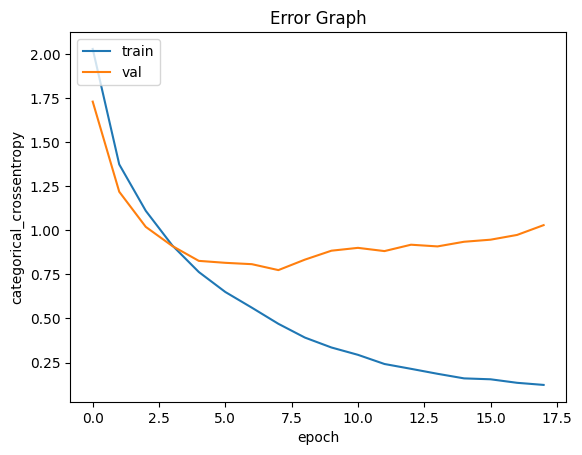

In [ ]:
plot_losses(history, loss)

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.825302243232727
Test accuracy: 0.7533000111579895


313/313 ━━━━━━━━━━━━━━━━━━━━ 60s 187ms/step


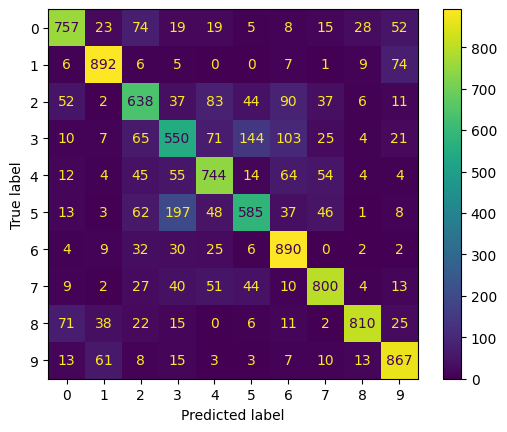

In [ ]:
y_pred = model.predict(x_test)

plot_cm(y_pred, y_test)

In [ ]:
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']

print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.80      0.76      0.78      1000
     class 1       0.86      0.89      0.87      1000
     class 2       0.65      0.64      0.64      1000
     class 3       0.57      0.55      0.56      1000
     class 4       0.71      0.74      0.73      1000
     class 5       0.69      0.58      0.63      1000
     class 6       0.73      0.89      0.80      1000
     class 7       0.81      0.80      0.80      1000
     class 8       0.92      0.81      0.86      1000
     class 9       0.81      0.87      0.83      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



Ahora ya tenemos resultados aceptables, pero esta no es la única forma de mejorar nuestro modelo, si ya conocemos alguna arquitectura del estado del arte para nuestra tarea podemos simplemente importar un modelo, congelarlo y reemplazar la última capa para que se ajuste a nuestro problema. Esto se llama `Transfer Learning` y es una de las formas más usadas para entrenar redes neuronales en la actualidad, ya que nos ahorra mucho tiempo de entrenamiento y nos permite usar modelos que ya han sido probados y que sabemos que funcionan bien.

### 1.2.4 Transfer Learning

In [ ]:
pre_trained_mobilenet = keras.applications.VGG16(input_shape=input_shape,include_top=False) #Cargamos la red pre-entrenada, sin la capa densa final, ya que queremos adaptar esta red a nuestro dataset.

#Agregamos una capa de GlobalAveragePooling2D para reducir la dimensionalidad de la salida de la red pre-entrenada y la capa de salida.
x = pre_trained_mobilenet.output
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs=pre_trained_mobilenet.input, outputs=outputs)

for layer in pre_trained_mobilenet.layers: #Tenemos que explicitar que no queremos entrenar las capas de la red pre-entrenada.
    layer.trainable = False

model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 32, 32, 3)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)        │      1,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)        │     36,928 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)       │     73,856 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)       │    147,584 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)         │    295,168 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)         │    590,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)         │    590,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)         │  1,180,160 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)         │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)         │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)         │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)         │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)         │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_average_pooling2d        │ (None, 512)               │          0 │
│ (GlobalAveragePooling2D)        │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_16 (Dense)                │ (None, 10)                │      5,130 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 14,719,818 (56.15 MB)

 Trainable params: 5,130 (20.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

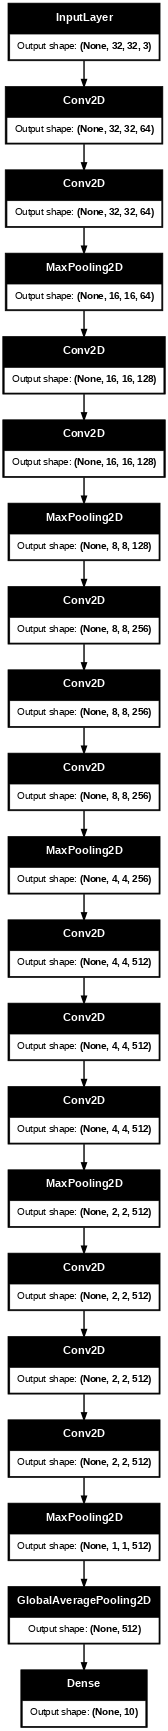

In [ ]:
keras.utils.plot_model(model, show_shapes=True, rankdir="TB", dpi=50)

In [ ]:
#Cambiamos el Optimizador
loss= keras.losses.CategoricalCrossentropy()
optimizer= keras.optimizers.AdamW(learning_rate=1e-3)
metrics=["accuracy"]

model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
#Entrenamos nuestro modelo
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=validation_split,
                    verbose=1,
                    callbacks=my_callbacks
                    )

NameError: ignored

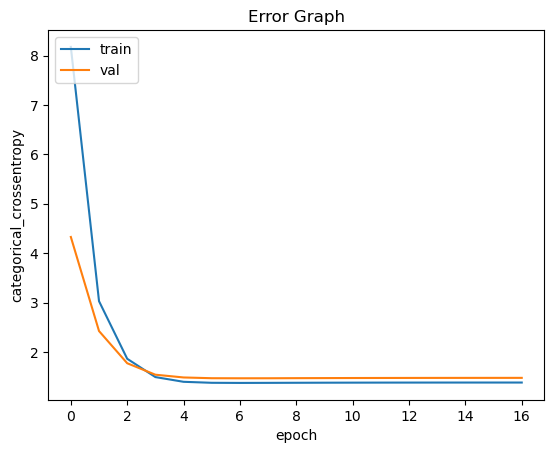

In [ ]:
plot_losses(history, loss)

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.4544460773468018
Test accuracy: 0.5475999712944031


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


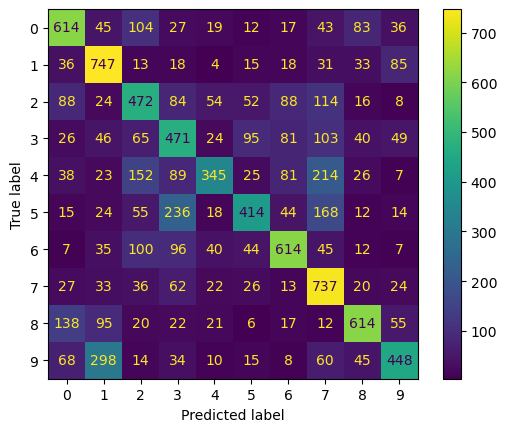

In [ ]:
y_pred = model.predict(x_test)

plot_cm(y_pred, y_test)

In [ ]:
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']

print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.58      0.61      0.60      1000
     class 1       0.55      0.75      0.63      1000
     class 2       0.46      0.47      0.46      1000
     class 3       0.41      0.47      0.44      1000
     class 4       0.62      0.34      0.44      1000
     class 5       0.59      0.41      0.49      1000
     class 6       0.63      0.61      0.62      1000
     class 7       0.48      0.74      0.58      1000
     class 8       0.68      0.61      0.65      1000
     class 9       0.61      0.45      0.52      1000

    accuracy                           0.55     10000
   macro avg       0.56      0.55      0.54     10000
weighted avg       0.56      0.55      0.54     10000



Podemos observar cómo no obtenemos resultados tan buenos como la red anterior pero hay que tener en cuenta que implementamos una arquitectura en menos de 5 lineas, desde cargar el modelo, agregar una capa de max pooling y finalmente la capa de salida.

## Parte 2: Datset Guiado

### 2.1 Exploracion de la Data

In [6]:
df = pd.read_csv('Steel_industry_data.csv')

In [7]:
df.head()

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  3600   
4                         64.72                         100.0  4500   

  WeekStatus Day_of_week   Load_Type  
0    Weekday      Monday  Light_Load  
1    Weekday      Monday  Light_Load  
2    Weekday      Monday  Light_Load  
3    Weekday      Monday  Light_Load  
4    Weekday      Monday  Light_Load

Siempre es bueno revisar los datos que tenemos, ver si existen datos faltantes, el tipo de dato de cada columna, etc.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

**Realice un pequeño EDA (Exploratory Data Analisys) del Dataset, mostrando algunos gráficos como el que se presenta a continuación, y comente lo que observa. [3pts]**

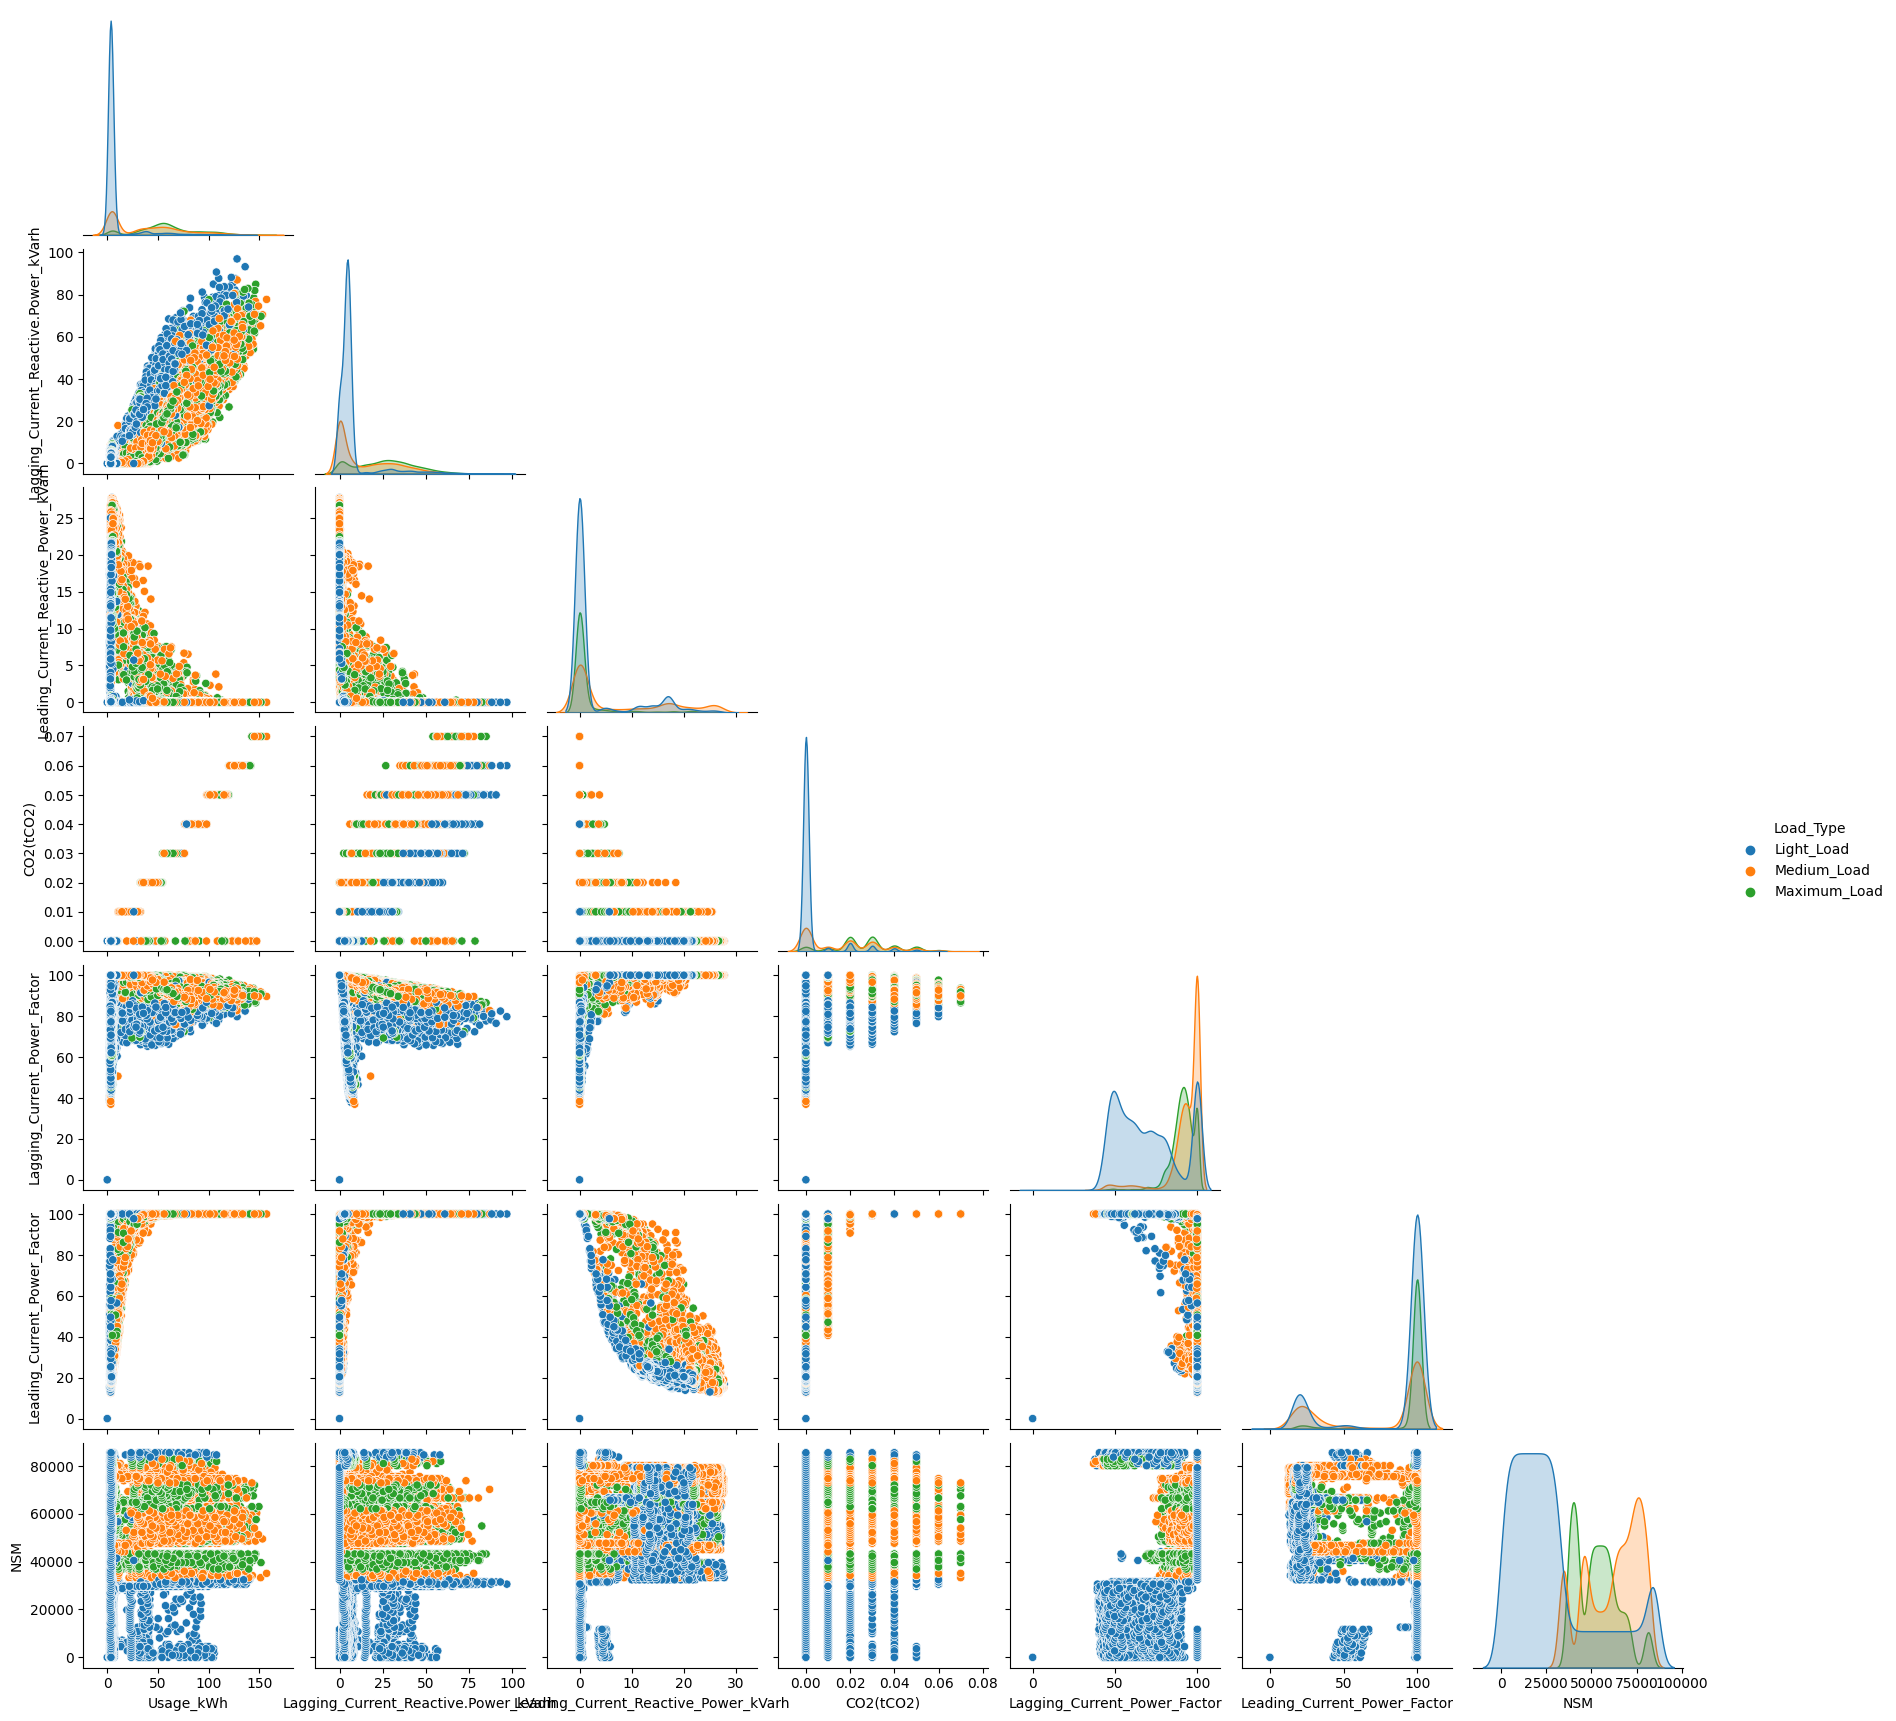

In [9]:
sns.pairplot(df, hue='Load_Type', corner = True)

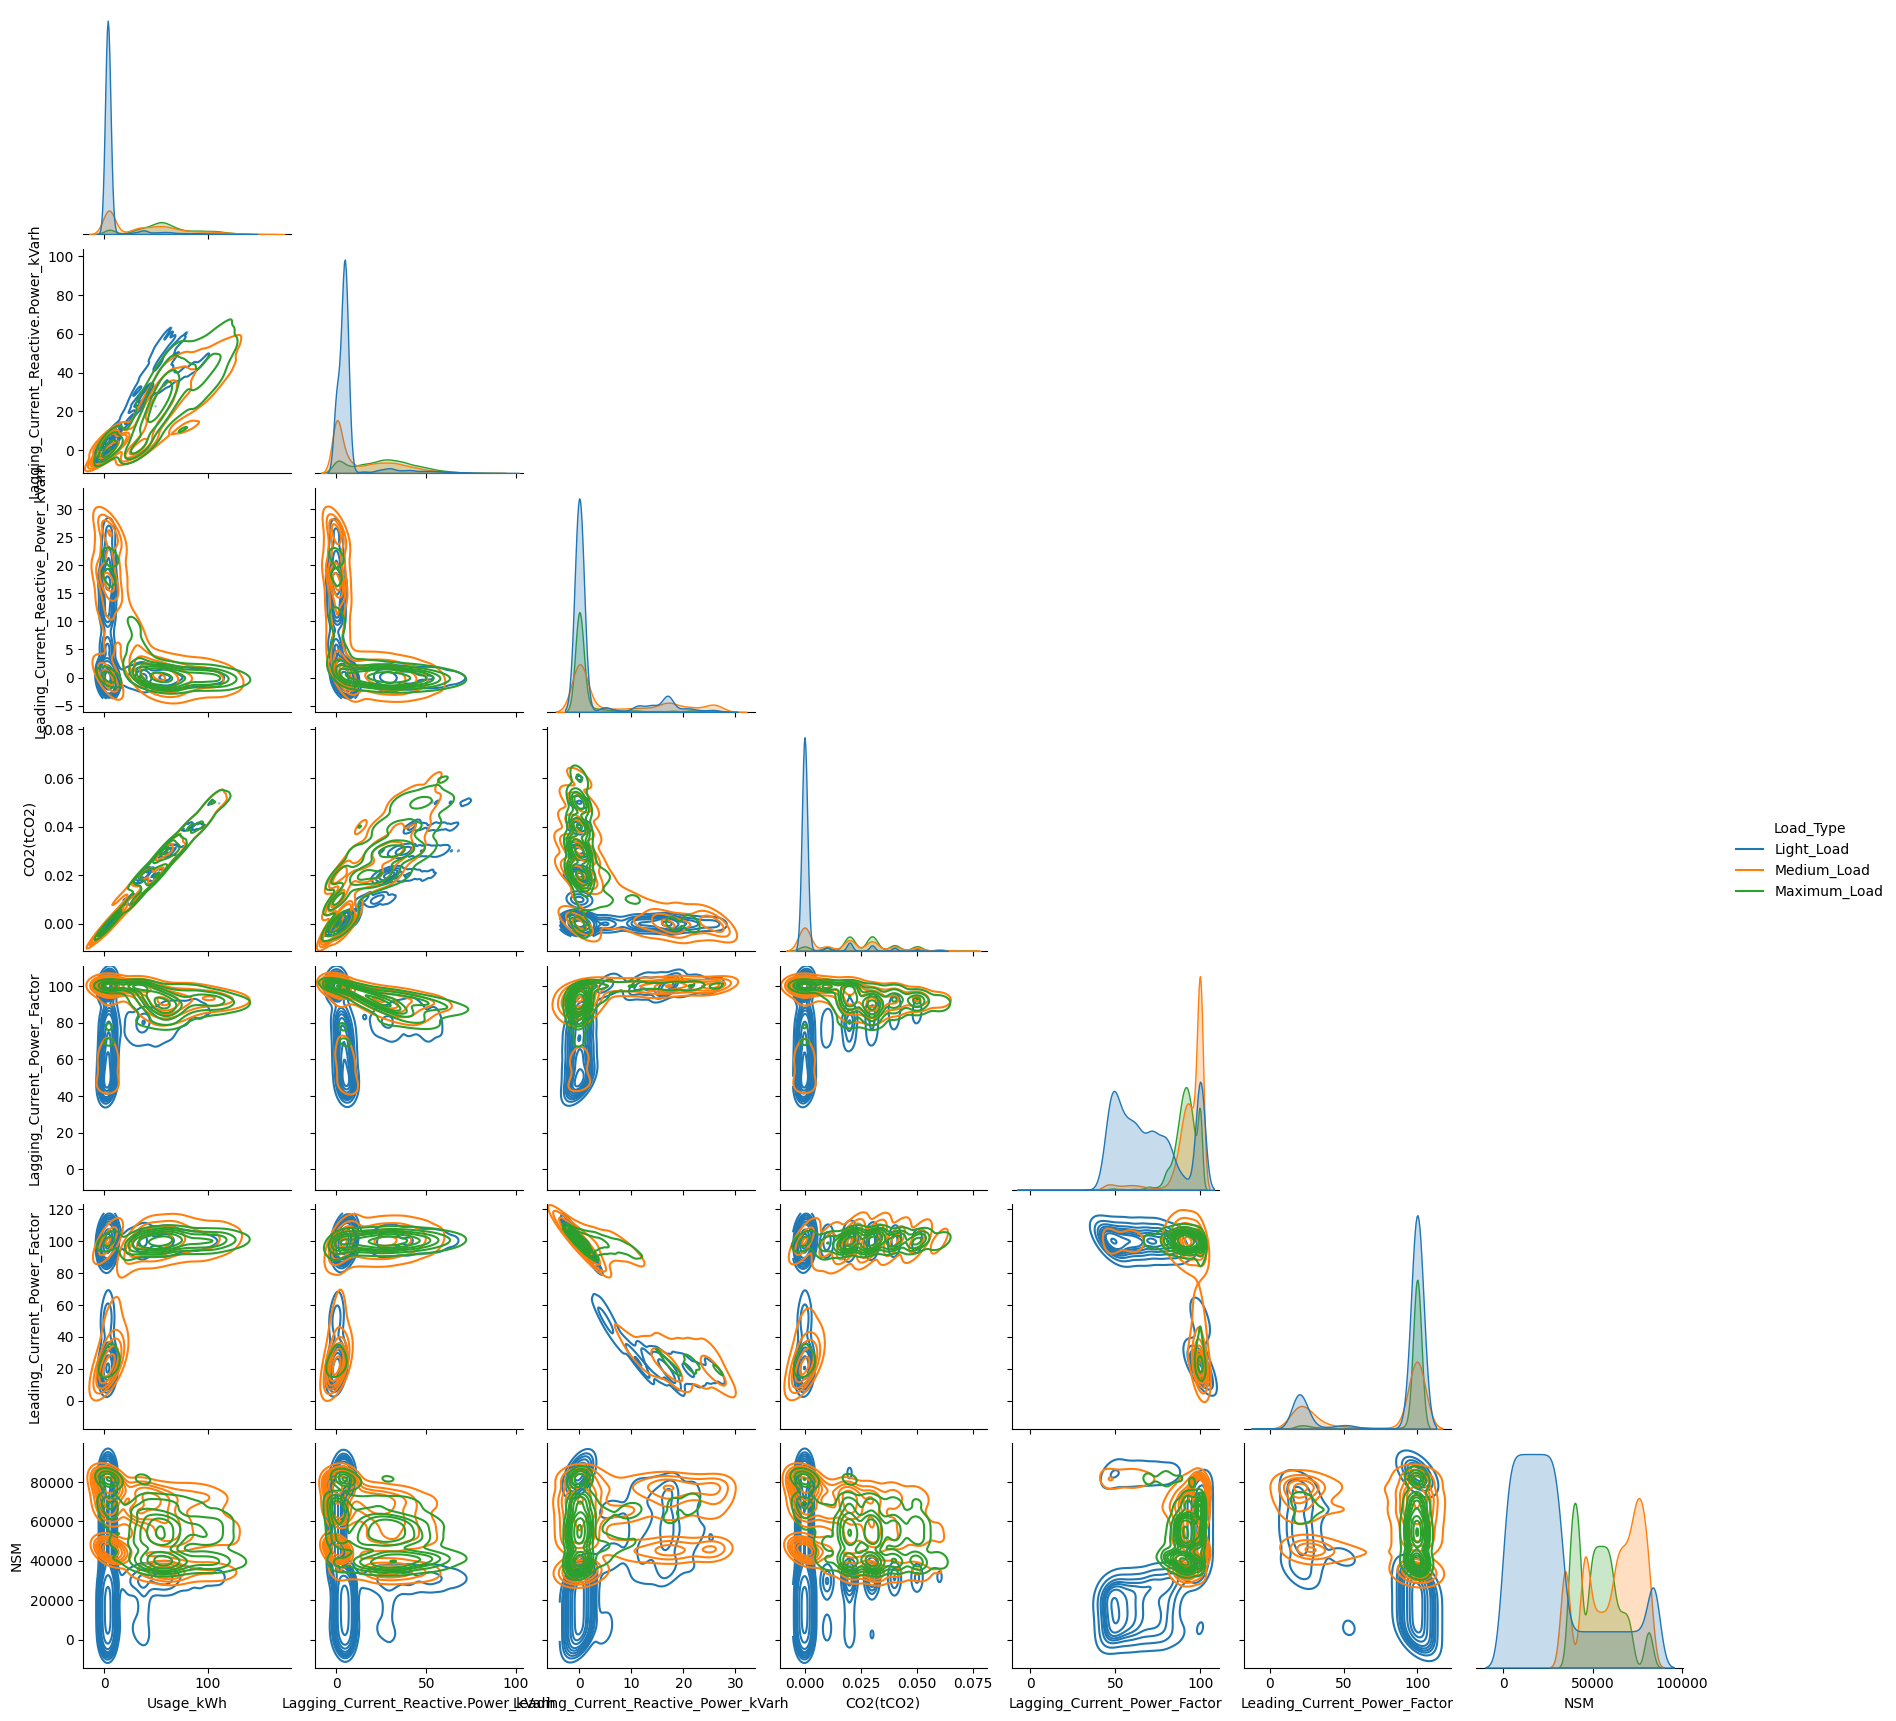

In [10]:
#Se ven todos los datos del conjunto, separando las variables según su categoría (Load_Type)
sns.pairplot(df, kind="kde", hue='Load_Type', corner = True)

Se pueden ver "islas" de datos al hacer la comparación usando KDE, estas islas son claramente diferenciables en algunos datos, permitiendonos realizar predicciones fiables a medida que sabemos más la ubicación de un dato particular en varios de estos plots. Analizaremos algunas variables más a fondo a continuación

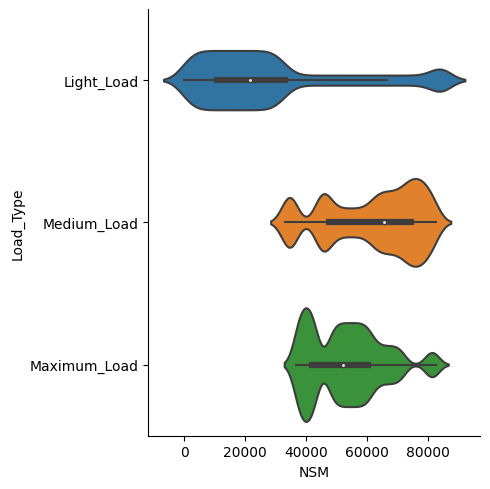

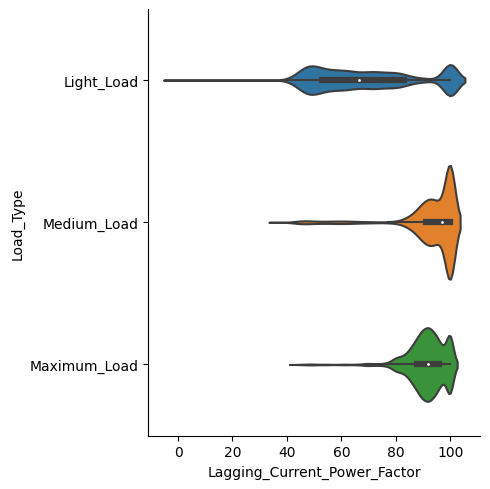

In [11]:
sns.catplot(data=df, x="NSM", y="Load_Type", kind="violin")
sns.catplot(data=df, x="Lagging_Current_Power_Factor", y="Load_Type", kind="violin")

En los graficos anteriores podemos ver que, en general, las Light_Load tienen menor NSM y Lagging Current Power Factor, que las otras dos clases, y existe diferencias entre Maximum_Load y Medium_Load, pero no lo suficientes para generar concluciones.

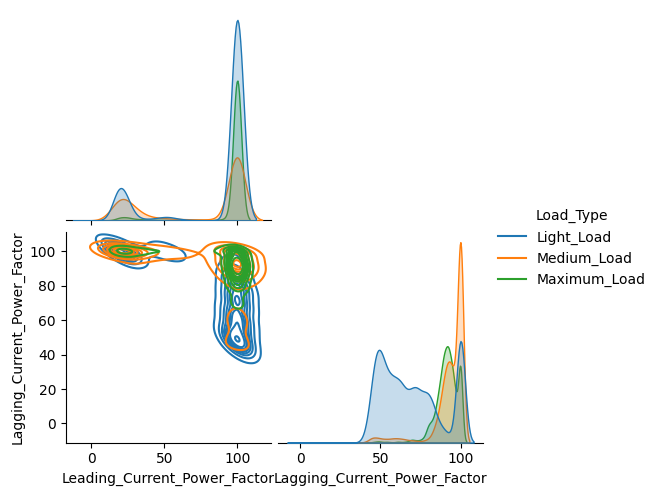

In [12]:
sns.pairplot(data=df, kind="kde", vars= ["Leading_Current_Power_Factor","Lagging_Current_Power_Factor"], corner = True, hue ="Load_Type")

Revisando más a fondo las variables de **Leading_Current_Power_Factor** y **Lagging_Current_Power_Factor** en un PairPlot, se pueden apreciar islas claramente marcadas:

*   **Light_Load**: Agrupados a lo largo de la derecha del grafico, entre y = [40,100], y por lo general no alejandose más allá de x = 80
*   **Medium_Load**: Agrupado a lo largo de la parte superior del grafico, por lo general no bajando de y = 80
*   Maximum_Load: Se encuentra en una gran isla ubicada en la esquina superior derecha del grafico entre x = [80,100], y = [80,100]

Estas marcadas diferencias en la distribución de los datos pueden ayudar a una red neuronal a clasificar entre los ditintos Load_Types

In [13]:
df["Usage_kWh"]

0        3.17
1        4.00
2        3.24
3        3.31
4        3.82
         ... 
35035    3.85
35036    3.74
35037    3.78
35038    3.78
35039    3.67
Name: Usage_kWh, Length: 35040, dtype: float64

In [14]:
Load_Types = df.groupby('Load_Type')
print("Medianas")
print("Light_Load: ",Load_Types.get_group("Light_Load")["Usage_kWh"].median())
print("Medium_Load: ",Load_Types.get_group("Medium_Load")["Usage_kWh"].median())
print("Maximum_Load: ",Load_Types.get_group("Maximum_Load")["Usage_kWh"].median())

print("Medias")
print("Light_Load: ",Load_Types.get_group("Light_Load")["Usage_kWh"].mean())
print("Medium_Load: ",Load_Types.get_group("Medium_Load")["Usage_kWh"].mean())
print("Maximum_Load: ",Load_Types.get_group("Maximum_Load")["Usage_kWh"].mean())

Medianas
Light_Load:  3.31
Medium_Load:  34.435
Maximum_Load:  56.63
Medias
Light_Load:  8.626206839309429
Medium_Load:  38.44539397689769
Maximum_Load:  59.26531353135314


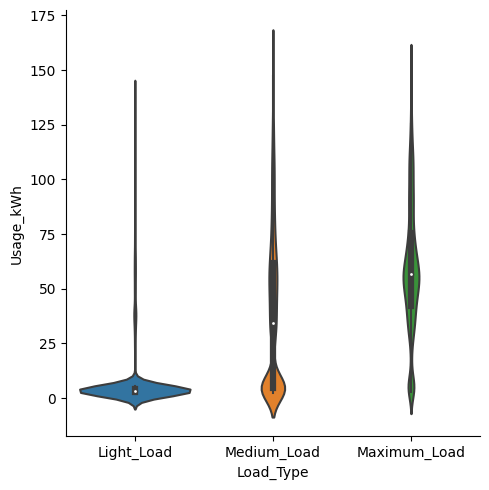

In [15]:
sns.catplot(data=df, x="Load_Type", y="Usage_kWh", kind="violin")


En este boxplot se puede observar como los Light_Load se encuentra sumamente concentrados en los valores cercanos a 0 (confirmandose por los valores de media y mediana calculados)

Por el otro lado, Medium_Load y Maximum_Load muestran una distribución bastante menos concentrada, pero aún así marcandose claras diferencias. Medium_Load es la clase con la cola más larga hacia valores altos, pero sus datos se siguen agrupando entre 10 y 60 (teniendo una concentración relativamente alta en valores cercanos a los de Light_Load), mientras que Maximum_Load tiene tambien una distribución con colas a ambos lados, pero contiene una concentración entre los valores de [40,80], siento esta concentración en valores más altos que la de Light_Load y Medium_Load

Estas diferencias observadas pueden ayudar facilmente a diferenciar la clase de Light_Load con las demas, ademas de permitirle a una red neuronal darle un poco mas probabilidad de que un dato en el rango de [70,80] sea Maximum_Load

Nos preguntamos porque Light_Load presenta tantos valores atipicos. A continuación vamos a analizar más de cerca.

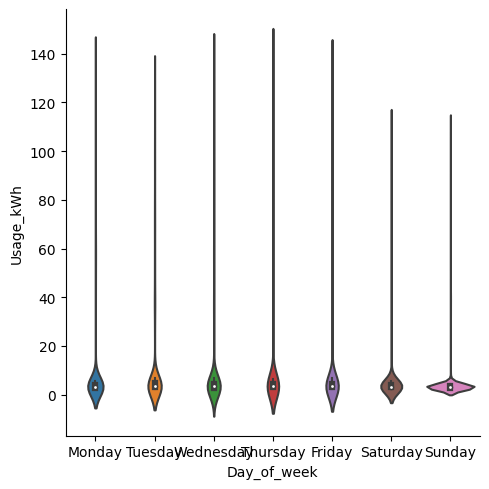

In [16]:
sns.catplot(data=Load_Types.get_group("Light_Load"), x="Day_of_week", y="Usage_kWh", kind = "violin")

array([[<Axes: title={'center': 'Friday'}>,
        <Axes: title={'center': 'Monday'}>,
        <Axes: title={'center': 'Saturday'}>],
       [<Axes: title={'center': 'Sunday'}>,
        <Axes: title={'center': 'Thursday'}>,
        <Axes: title={'center': 'Tuesday'}>],
       [<Axes: title={'center': 'Wednesday'}>, <Axes: >, <Axes: >]],
      dtype=object)

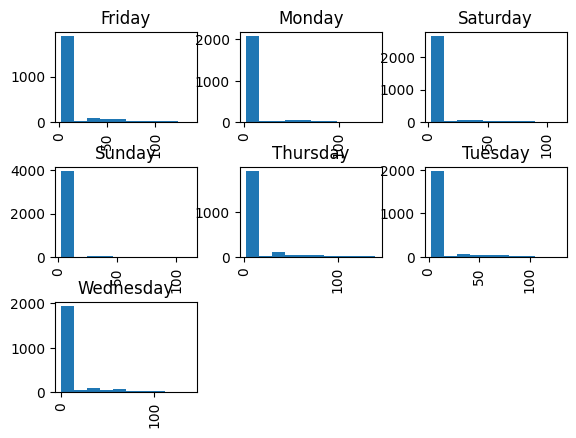

In [17]:
Load_Types.get_group("Light_Load").hist(column='Usage_kWh', by='Day_of_week')

Se ve que el sábado y domingo ocurre algo. Usando histogramas se ve que la mayoría de los datos de Usage_kWh en los sábados y domingos ocurre en valores bajos

array([[<Axes: title={'center': 'Friday'}>,
        <Axes: title={'center': 'Monday'}>,
        <Axes: title={'center': 'Saturday'}>],
       [<Axes: title={'center': 'Sunday'}>,
        <Axes: title={'center': 'Thursday'}>,
        <Axes: title={'center': 'Tuesday'}>],
       [<Axes: title={'center': 'Wednesday'}>, <Axes: >, <Axes: >]],
      dtype=object)

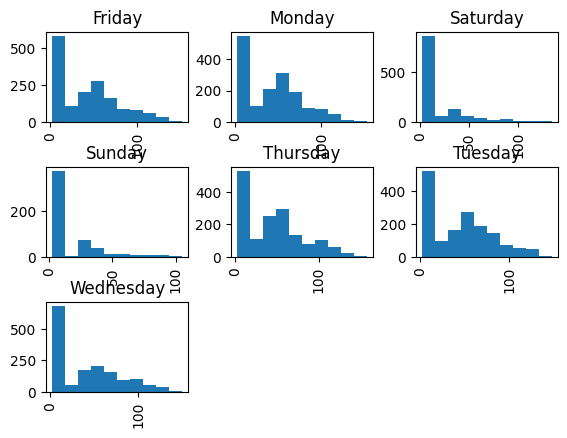

In [18]:
Load_Types.get_group("Medium_Load").hist(column='Usage_kWh', by='Day_of_week')

array([[<Axes: title={'center': 'Friday'}>,
        <Axes: title={'center': 'Monday'}>,
        <Axes: title={'center': 'Saturday'}>],
       [<Axes: title={'center': 'Sunday'}>,
        <Axes: title={'center': 'Thursday'}>,
        <Axes: title={'center': 'Tuesday'}>],
       [<Axes: title={'center': 'Wednesday'}>, <Axes: >, <Axes: >]],
      dtype=object)

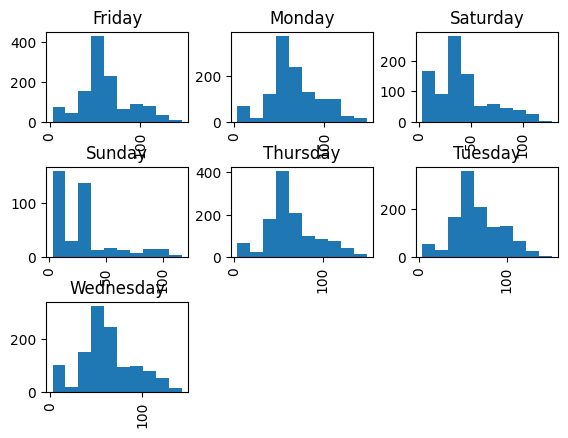

In [19]:
Load_Types.get_group("Maximum_Load").hist(column='Usage_kWh', by='Day_of_week')

En los anteriores histogramas se puede apreciar que, a diferencia que los Light_Load y los Medium_Load. Los Maximum_Load tienen una cantidad mayor de datos con Usage_kWh alejados del cero, en especial el Sabado, donde se ve una cola larga hacia el 100. Esto puede ayudar a diferenciar entre Light_Load y Medium_Load.

Si el dato tiene alto Uso de kWh y ademas es de un Sabado o Doming, tendra más posibilidades de ser un Maximum_Load

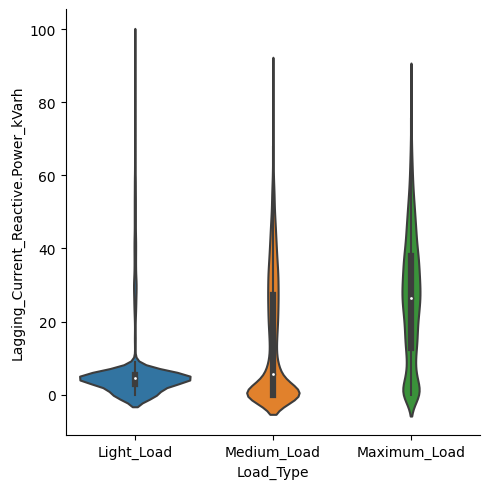

In [20]:
sns.catplot(data=df, x="Load_Type", y="Lagging_Current_Reactive.Power_kVarh", kind = "violin")

Similarmente, para la variable Lagging_Current_Reactive.Power_kVarh ocurre una tendencia similar al estar ligada a la variable anterior Usage_kWh.

Como conclusión de ambas variables, se ve que la mayoría del consumo ocurre entre 0 y 60kWh durante los día de la semana, mostrándose un menor consumo los fines de semana, siendo explicada posiblemente por el horario laboral donde las fabricas cierran más temprano los sabados y los domingo están sin mucha operación. Los datos outliers es necesario más información para poder justificarlos; pero, almenos durante la semana, no existen muchos datos que escapen de lo esperado.

<Axes: xlabel='Load_Type', ylabel='Leading_Current_Reactive_Power_kVarh'>

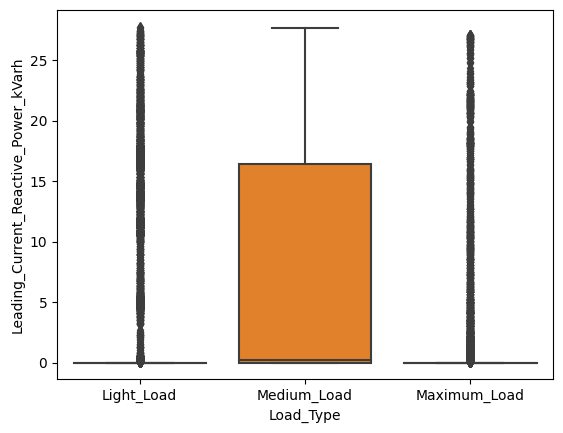

In [21]:
sns.boxplot(data=df, x="Load_Type", y="Leading_Current_Reactive_Power_kVarh")

Para esta variable también ocurre algo, en especial para Medium_Load veamos más de cerca.

<Axes: xlabel='Day_of_week', ylabel='Leading_Current_Reactive_Power_kVarh'>

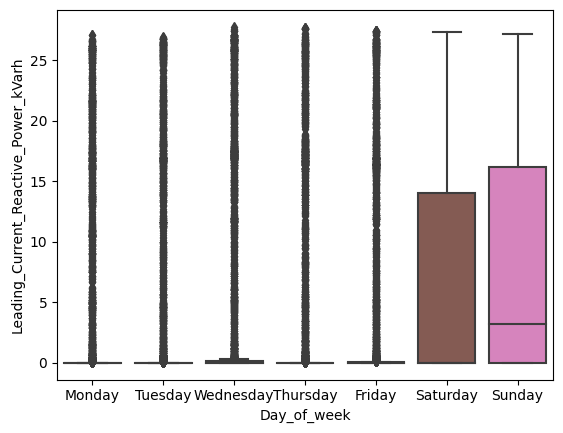

In [22]:
sns.boxplot(data=df, x="Day_of_week", y="Leading_Current_Reactive_Power_kVarh")

Se puede ver que, al contrario de las variables anteriores, la mayoría del uso ocurre en los fines de semana, dentro de la semana la mayoría de los datos están cerca del 0.

<Axes: xlabel='Load_Type', ylabel='CO2(tCO2)'>

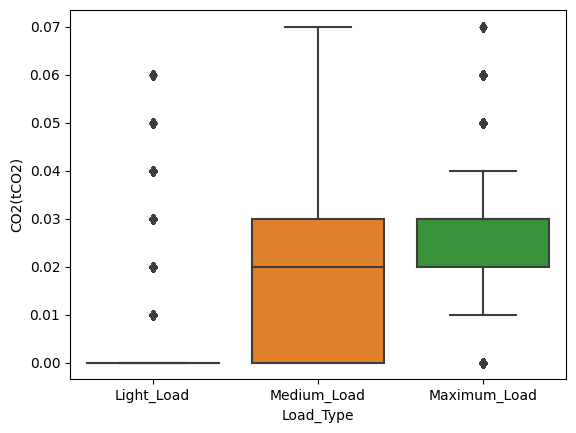

In [23]:
sns.boxplot(data=df, x="Load_Type", y="CO2(tCO2)")

Se puede apreciar claramente como la mayoria de los datos de Light_Load se encuentran agrupados en valores muy cercanos al cero, y que Maximum_Load se encuentra agrupado entre 0,01 y 0.04. Medium_load se encuentra bastante distribuido

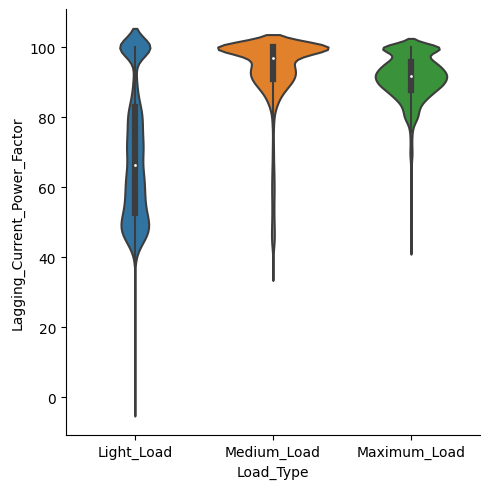

In [24]:
sns.catplot(data=df, x="Load_Type", y="Lagging_Current_Power_Factor", kind= "violin")

Se aprecia una clara diferencia entre Light_Load y los demas, pero no entre Medium_load y Maximum_Load

<Axes: xlabel='Load_Type', ylabel='Leading_Current_Power_Factor'>

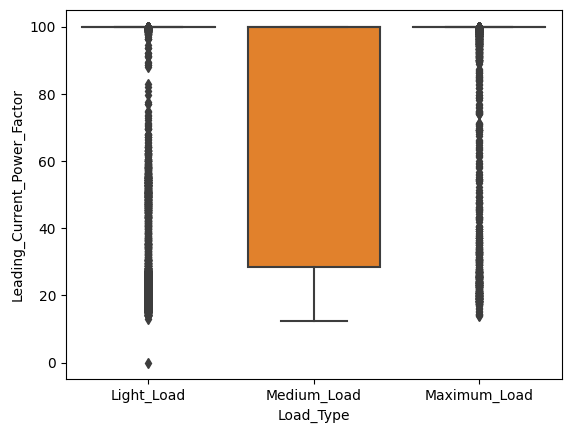

In [25]:
sns.boxplot(data=df, x="Load_Type", y="Leading_Current_Power_Factor")

<Axes: xlabel='Load_Type', ylabel='NSM'>

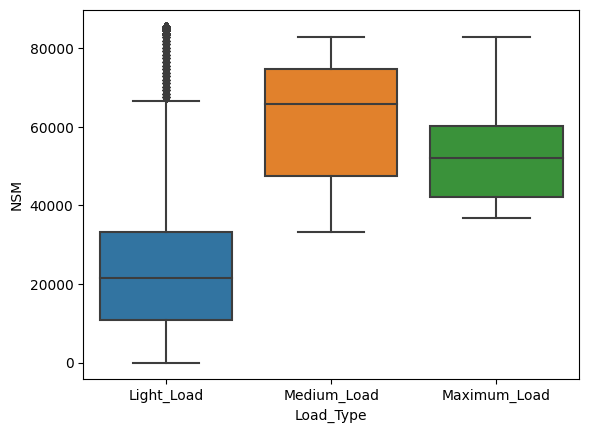

In [26]:
sns.boxplot(data=df, x="Load_Type", y="NSM")

### 2.2 Preprocesamiento

El proceso típico de entrenamiento de un modelo consta de dividir la data en 3 conjuntos, uno para entrenamiento, otro para validación y otro para testing

**Defina cuál es la utilidad de cada uno de estos conjuntos e implemente el código para separar la data considerando un split de 80/10/10 respectivamente** [3 Pts]

*80% de la data para entrenamiento, 10% para validación y el 10% para testing*

*Para ello se puede apoyar en la función [train_test_split](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) de scikit-learn.*

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size="size_for_test", random_state=SEED)
```
```
# Using a pandas dataframe
df_train, df_test = train_test_split(df_data, test_size="size_for_test", random_state=SEED)
```

In [27]:
# Dividir la data considerando el split indicado anteriormente (se recomienda separar en train y test en esta sección, y separar en validación en la sección de entrenamiento)
### START CODE HERE ###
df_train, df_test = train_test_split(df, test_size=0.2, random_state=SEED)
df_test, df_val = train_test_split(df_test, test_size=0.5, random_state=SEED)



*   `Training`: El conjunto de training es utilizado para, valga la redundancia, entrenar las redes neuronales para asignarle los pesos correspondientes a cada neurona. Es importante tener una buena cantidad de datos para poder tener un correcto aprendizaje de la red y obtener los parámetros.



In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28032 entries, 9284 to 15795
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  28032 non-null  object 
 1   Usage_kWh                             28032 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  28032 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  28032 non-null  float64
 4   CO2(tCO2)                             28032 non-null  float64
 5   Lagging_Current_Power_Factor          28032 non-null  float64
 6   Leading_Current_Power_Factor          28032 non-null  float64
 7   NSM                                   28032 non-null  int64  
 8   WeekStatus                            28032 non-null  object 
 9   Day_of_week                           28032 non-null  object 
 10  Load_Type                             28032 non-null  object 
dtypes: float64(6



*   `Validation`:Conjunto de datos que va de la mano con el training, son utilizados para ajustar los hiperparámetros e ir guiando las neuronas tras el testing.


In [29]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3504 entries, 33387 to 14615
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  3504 non-null   object 
 1   Usage_kWh                             3504 non-null   float64
 2   Lagging_Current_Reactive.Power_kVarh  3504 non-null   float64
 3   Leading_Current_Reactive_Power_kVarh  3504 non-null   float64
 4   CO2(tCO2)                             3504 non-null   float64
 5   Lagging_Current_Power_Factor          3504 non-null   float64
 6   Leading_Current_Power_Factor          3504 non-null   float64
 7   NSM                                   3504 non-null   int64  
 8   WeekStatus                            3504 non-null   object 
 9   Day_of_week                           3504 non-null   object 
 10  Load_Type                             3504 non-null   object 
dtypes: float64(6


*   `Testing`:Datos utilizados para probar el rendimiento final del modelo tras haber sido ajustados los parámetros e hiperparámetros. La idea es que sean modelos no vistos anteriormente, he ahí el separarlos en su propio conjunto, para comprobar la calidad de las predicciones de la red neuronal.



In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3504 entries, 29844 to 11189
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  3504 non-null   object 
 1   Usage_kWh                             3504 non-null   float64
 2   Lagging_Current_Reactive.Power_kVarh  3504 non-null   float64
 3   Leading_Current_Reactive_Power_kVarh  3504 non-null   float64
 4   CO2(tCO2)                             3504 non-null   float64
 5   Lagging_Current_Power_Factor          3504 non-null   float64
 6   Leading_Current_Power_Factor          3504 non-null   float64
 7   NSM                                   3504 non-null   int64  
 8   WeekStatus                            3504 non-null   object 
 9   Day_of_week                           3504 non-null   object 
 10  Load_Type                             3504 non-null   object 
dtypes: float64(6

### 2.3 Feature Engineering

Feature Engineering se considera un arte porque involucra mucho la creatividad con el conocimiento del dominio del problema. Consiste en el proceso de crear nuevas características o features a partir de otras existentes. En general la idea principal es la de utilizar el conocimiento del contexto del problema o bien del dominio de los datos para aprovechar esa información y crear features que puedan ayudar en el desempeño de un algoritmo, si bien existen técnicas más o menos estándar como lo puede ser normalizar o estandarizar valores numéricos tambien existen otras transformaciones que no son tan simples y varían mucho dependiendo del problema.

[Referencia](https://elitedatascience.com/feature-engineering)

#### Standard Techniques

Como se ha mencionado anteriormente existen técnicas bastante conocidas en la actualidad para abordar el apartado de Feature Engineer donde la mayoría de estas se pueden dividir en dos grandes grupos dependiendo del tipo de datos tengamos:

1.   Variables numéricas
2.   Variables categóricas

#### Numerical values

*   Normalizing: `MinMaxScaler `
*   Standarizing: `StandardScaler`

#### Categorical values

*   `One-Hot Encoding.`
*   `Ordinal Encoding.`
*   `Label Encoding.`





**Observe el siguiente código y comente cuál podría ser su utilidad para una variable relacionada con fechas, como lo puede ser un día** [2 Pts]

* Respuesta: El siguiente codigo nos puede ayudar a representar el orden ciclico que tienen los dias de la semana y las horas del día, de tal manera que la red neuronal pueda entender que estos conceptos de ciclicalidad.

In [31]:
def preprocess_time(df, column, period):
    df['sin_'+column] = np.sin(2 * np.pi * df[column] / period)
    df['cos_'+column] = np.cos(2 * np.pi * df[column] / period)
    df.drop([column], axis=1, inplace=True)
    return df

In [32]:
# Crear un dataframe de muestra y aplicar la función
df_day = pd.DataFrame(data=np.arange(1, 366), columns=["day"])
df_day = preprocess_time(df_day, "day", 365)
df_day.head()

sin_day   cos_day
0  0.017213  0.999852
1  0.034422  0.999407
2  0.051620  0.998667
3  0.068802  0.997630
4  0.085965  0.996298

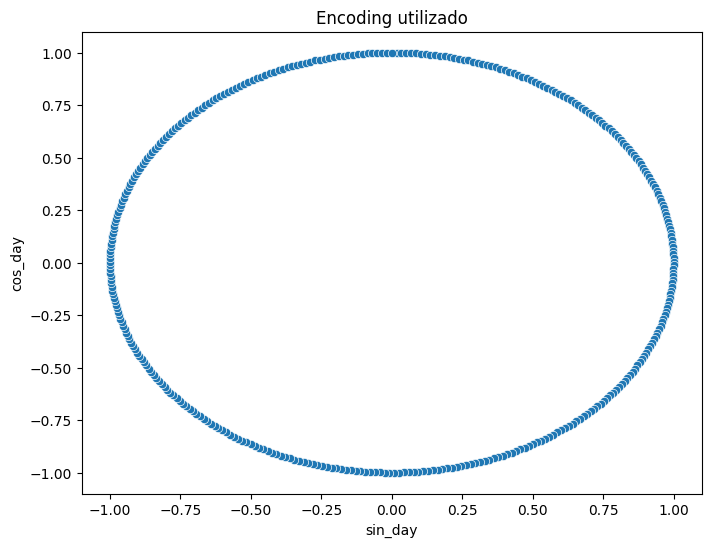

In [33]:
# Mostrar la transformación aplicada
fig = plt.figure(figsize=(8, 6))

sns.scatterplot(data=df_day, x="sin_day", y="cos_day").set_title("Encoding utilizado")

plt.show()

`Respuesta`:

**Defina o explique la transformación que aplica cada uno de los siguientes encoding e indique la diferencia entre ellos considerando sklearn** [3 Pts]




*   `One-Hot Encoding`: Toma un array de enteros o strings y lo transforma en una columna binaria.
*   `Ordinal Encoding`:Toma un array de enteros o strings y, dependiendo de la feature o rango, retorna una única columna de enteros.
*   `Label Encoding`:Como su nombre indica, sirve para clasificar los outputs y de la red neuronal, permitiéndole a la red neuronal trabajar con los valores numéricos de las clases.

**Aplique las siguientes técnicas de preprocesamiento para cada feature especificado:** [3 Pts]

*   `MinMaxScaler` con rango (0, 1): `CO2(tCO2)`, `NSM`

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['CO2(tCO2)', 'NSM']] = scaler.fit_transform(df[['CO2(tCO2)', 'NSM']])
df

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0      01/01/2018 00:15       3.17                                  2.95   
1      01/01/2018 00:30       4.00                                  4.46   
2      01/01/2018 00:45       3.24                                  3.28   
3      01/01/2018 01:00       3.31                                  3.56   
4      01/01/2018 01:15       3.82                                  4.50   
...                 ...        ...                                   ...   
35035  31/12/2018 23:00       3.85                                  4.86   
35036  31/12/2018 23:15       3.74                                  3.74   
35037  31/12/2018 23:30       3.78                                  3.17   
35038  31/12/2018 23:45       3.78                                  3.06   
35039  31/12/2018 00:00       3.67                                  3.02   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                      0.00        0.0   
1                                      0.00        0.0   
2                                      0.00        0.0   
3                                      0.00        0.0   
4                                      0.00        0.0   
...                                     ...        ...   
35035                                  0.00        0.0   
35036                                  0.00        0.0   
35037                                  0.07        0.0   
35038                                  0.11        0.0   
35039                                  0.07        0.0   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor       NSM  \
0                             73.21                        100.00  0.010526   
1                             66.77                        100.00  0.021053   
2                             70.28                        100.00  0.031579   
3                             68.09                        100.00  0.042105   
4                             64.72                        100.00  0.052632   
...                             ...                           ...       ...   
35035                         62.10                        100.00  0.968421   
35036                         70.71                        100.00  0.978947   
35037                         76.62                         99.98  0.989474   
35038                         77.72                         99.96  1.000000   
35039                         77.22                         99.98  0.000000   

      WeekStatus Day_of_week   Load_Type  
0        Weekday      Monday  Light_Load  
1        Weekday      Monday  Light_Load  
2        Weekday      Monday  Light_Load  
3        Weekday      Monday  Light_Load  
4        Weekday      Monday  Light_Load  
...          ...         ...         ...  
35035    Weekday      Monday  Light_Load  
35036    Weekday      Monday  Light_Load  
35037    Weekday      Monday  Light_Load  
35038    Weekday      Monday  Light_Load  
35039    Weekday      Monday  Light_Load  

[35040 rows x 11 columns]

*   `StandardScaler`:`Leading_Current_Reactive_Power_kVarh`, `Lagging_Current_Power_Factor`,`Leading_Current_Power_Factor`



In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Lagging_Current_Reactive.Power_kVarh',"Lagging_Current_Power_Factor", "Leading_Current_Power_Factor"]] = scaler.fit_transform(df[['Lagging_Current_Reactive.Power_kVarh',"Lagging_Current_Power_Factor", "Leading_Current_Power_Factor"]])
df

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0      01/01/2018 00:15       3.17                             -0.618516   
1      01/01/2018 00:30       4.00                             -0.525911   
2      01/01/2018 00:45       3.24                             -0.598278   
3      01/01/2018 01:00       3.31                             -0.581106   
4      01/01/2018 01:15       3.82                             -0.523458   
...                 ...        ...                                   ...   
35035  31/12/2018 23:00       3.85                             -0.501380   
35036  31/12/2018 23:15       3.74                             -0.570067   
35037  31/12/2018 23:30       3.78                             -0.605024   
35038  31/12/2018 23:45       3.78                             -0.611770   
35039  31/12/2018 00:00       3.67                             -0.614223   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                      0.00        0.0   
1                                      0.00        0.0   
2                                      0.00        0.0   
3                                      0.00        0.0   
4                                      0.00        0.0   
...                                     ...        ...   
35035                                  0.00        0.0   
35036                                  0.00        0.0   
35037                                  0.07        0.0   
35038                                  0.11        0.0   
35039                                  0.07        0.0   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor       NSM  \
0                         -0.389410                      0.513268  0.010526   
1                         -0.729772                      0.513268  0.021053   
2                         -0.544264                      0.513268  0.031579   
3                         -0.660009                      0.513268  0.042105   
4                         -0.838117                      0.513268  0.052632   
...                             ...                           ...       ...   
35035                     -0.976587                      0.513268  0.968421   
35036                     -0.521538                      0.513268  0.978947   
35037                     -0.209188                      0.512611  0.989474   
35038                     -0.151052                      0.511954  1.000000   
35039                     -0.177477                      0.512611  0.000000   

      WeekStatus Day_of_week   Load_Type  
0        Weekday      Monday  Light_Load  
1        Weekday      Monday  Light_Load  
2        Weekday      Monday  Light_Load  
3        Weekday      Monday  Light_Load  
4        Weekday      Monday  Light_Load  
...          ...         ...         ...  
35035    Weekday      Monday  Light_Load  
35036    Weekday      Monday  Light_Load  
35037    Weekday      Monday  Light_Load  
35038    Weekday      Monday  Light_Load  
35039    Weekday      Monday  Light_Load  

[35040 rows x 11 columns]

*   `Ordinal Encoding`: `Load_Type`

In [36]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df[['Load_Type']] = encoder.fit_transform(df[['Load_Type']])
df

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0      01/01/2018 00:15       3.17                             -0.618516   
1      01/01/2018 00:30       4.00                             -0.525911   
2      01/01/2018 00:45       3.24                             -0.598278   
3      01/01/2018 01:00       3.31                             -0.581106   
4      01/01/2018 01:15       3.82                             -0.523458   
...                 ...        ...                                   ...   
35035  31/12/2018 23:00       3.85                             -0.501380   
35036  31/12/2018 23:15       3.74                             -0.570067   
35037  31/12/2018 23:30       3.78                             -0.605024   
35038  31/12/2018 23:45       3.78                             -0.611770   
35039  31/12/2018 00:00       3.67                             -0.614223   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                      0.00        0.0   
1                                      0.00        0.0   
2                                      0.00        0.0   
3                                      0.00        0.0   
4                                      0.00        0.0   
...                                     ...        ...   
35035                                  0.00        0.0   
35036                                  0.00        0.0   
35037                                  0.07        0.0   
35038                                  0.11        0.0   
35039                                  0.07        0.0   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor       NSM  \
0                         -0.389410                      0.513268  0.010526   
1                         -0.729772                      0.513268  0.021053   
2                         -0.544264                      0.513268  0.031579   
3                         -0.660009                      0.513268  0.042105   
4                         -0.838117                      0.513268  0.052632   
...                             ...                           ...       ...   
35035                     -0.976587                      0.513268  0.968421   
35036                     -0.521538                      0.513268  0.978947   
35037                     -0.209188                      0.512611  0.989474   
35038                     -0.151052                      0.511954  1.000000   
35039                     -0.177477                      0.512611  0.000000   

      WeekStatus Day_of_week  Load_Type  
0        Weekday      Monday        0.0  
1        Weekday      Monday        0.0  
2        Weekday      Monday        0.0  
3        Weekday      Monday        0.0  
4        Weekday      Monday        0.0  
...          ...         ...        ...  
35035    Weekday      Monday        0.0  
35036    Weekday      Monday        0.0  
35037    Weekday      Monday        0.0  
35038    Weekday      Monday        0.0  
35039    Weekday      Monday        0.0  

[35040 rows x 11 columns]

*   `One-Hot Encoding`: `WeekStatus`

In [37]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse = False)
encoded_features = encoder.fit_transform(df[["WeekStatus"]])

# Create a new dataframe with the one-hot encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(["WeekStatus"]))
encoded_df
# Concatenate the encoded dataframe with the original dataframe
df = pd.concat([df, encoded_df], axis=1)

# Drop the original "WeekStatus" column
df.drop("WeekStatus", axis=1, inplace=True)
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                             -0.618516   
1  01/01/2018 00:30       4.00                             -0.525911   
2  01/01/2018 00:45       3.24                             -0.598278   
3  01/01/2018 01:00       3.31                             -0.581106   
4  01/01/2018 01:15       3.82                             -0.523458   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor       NSM  \
0                     -0.389410                      0.513268  0.010526   
1                     -0.729772                      0.513268  0.021053   
2                     -0.544264                      0.513268  0.031579   
3                     -0.660009                      0.513268  0.042105   
4                     -0.838117                      0.513268  0.052632   

  Day_of_week  Load_Type  WeekStatus_Weekday  WeekStatus_Weekend  
0      Monday        0.0                 1.0                 0.0  
1      Monday        0.0                 1.0                 0.0  
2      Monday        0.0                 1.0                 0.0  
3      Monday        0.0                 1.0                 0.0  
4      Monday        0.0                 1.0                 0.0

*   `Label Encoding`: `Day_of_week`

In [38]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Day_of_week'] = encoder.fit_transform(df['Day_of_week'])
df

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0      01/01/2018 00:15       3.17                             -0.618516   
1      01/01/2018 00:30       4.00                             -0.525911   
2      01/01/2018 00:45       3.24                             -0.598278   
3      01/01/2018 01:00       3.31                             -0.581106   
4      01/01/2018 01:15       3.82                             -0.523458   
...                 ...        ...                                   ...   
35035  31/12/2018 23:00       3.85                             -0.501380   
35036  31/12/2018 23:15       3.74                             -0.570067   
35037  31/12/2018 23:30       3.78                             -0.605024   
35038  31/12/2018 23:45       3.78                             -0.611770   
35039  31/12/2018 00:00       3.67                             -0.614223   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                      0.00        0.0   
1                                      0.00        0.0   
2                                      0.00        0.0   
3                                      0.00        0.0   
4                                      0.00        0.0   
...                                     ...        ...   
35035                                  0.00        0.0   
35036                                  0.00        0.0   
35037                                  0.07        0.0   
35038                                  0.11        0.0   
35039                                  0.07        0.0   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor       NSM  \
0                         -0.389410                      0.513268  0.010526   
1                         -0.729772                      0.513268  0.021053   
2                         -0.544264                      0.513268  0.031579   
3                         -0.660009                      0.513268  0.042105   
4                         -0.838117                      0.513268  0.052632   
...                             ...                           ...       ...   
35035                     -0.976587                      0.513268  0.968421   
35036                     -0.521538                      0.513268  0.978947   
35037                     -0.209188                      0.512611  0.989474   
35038                     -0.151052                      0.511954  1.000000   
35039                     -0.177477                      0.512611  0.000000   

       Day_of_week  Load_Type  WeekStatus_Weekday  WeekStatus_Weekend  
0                1        0.0                 1.0                 0.0  
1                1        0.0                 1.0                 0.0  
2                1        0.0                 1.0                 0.0  
3                1        0.0                 1.0                 0.0  
4                1        0.0                 1.0                 0.0  
...            ...        ...                 ...                 ...  
35035            1        0.0                 1.0                 0.0  
35036            1        0.0                 1.0                 0.0  
35037            1        0.0                 1.0                 0.0  
35038            1        0.0                 1.0                 0.0  
35039            1        0.0                 1.0                 0.0  

[35040 rows x 12 columns]

Por último separe en `dia`, `mes` y `hora` la columna `date` y aplique la transformación cíclica a las nuevas columnas (con el periodo correspondiente para cada una).

In [39]:
# preprocesamiendo indicado

# convertir las fechas en un objeto datetime
df['date'] = pd.to_datetime(df['date'])

# extraer la información del datetime
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year


In [40]:
df.head()

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0 2018-01-01 00:15:00       3.17                             -0.618516   
1 2018-01-01 00:30:00       4.00                             -0.525911   
2 2018-01-01 00:45:00       3.24                             -0.598278   
3 2018-01-01 01:00:00       3.31                             -0.581106   
4 2018-01-01 01:15:00       3.82                             -0.523458   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor       NSM  \
0                     -0.389410                      0.513268  0.010526   
1                     -0.729772                      0.513268  0.021053   
2                     -0.544264                      0.513268  0.031579   
3                     -0.660009                      0.513268  0.042105   
4                     -0.838117                      0.513268  0.052632   

   Day_of_week  Load_Type  WeekStatus_Weekday  WeekStatus_Weekend  day  month  \
0            1        0.0                 1.0                 0.0    1      1   
1            1        0.0                 1.0                 0.0    1      1   
2            1        0.0                 1.0                 0.0    1      1   
3            1        0.0                 1.0                 0.0    1      1   
4            1        0.0                 1.0                 0.0    1      1   

   year  
0  2018  
1  2018  
2  2018  
3  2018  
4  2018

In [41]:
preprocess_time(df,'month', 12)

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0     2018-01-01 00:15:00       3.17                             -0.618516   
1     2018-01-01 00:30:00       4.00                             -0.525911   
2     2018-01-01 00:45:00       3.24                             -0.598278   
3     2018-01-01 01:00:00       3.31                             -0.581106   
4     2018-01-01 01:15:00       3.82                             -0.523458   
...                   ...        ...                                   ...   
35035 2018-12-31 23:00:00       3.85                             -0.501380   
35036 2018-12-31 23:15:00       3.74                             -0.570067   
35037 2018-12-31 23:30:00       3.78                             -0.605024   
35038 2018-12-31 23:45:00       3.78                             -0.611770   
35039 2018-12-31 00:00:00       3.67                             -0.614223   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                      0.00        0.0   
1                                      0.00        0.0   
2                                      0.00        0.0   
3                                      0.00        0.0   
4                                      0.00        0.0   
...                                     ...        ...   
35035                                  0.00        0.0   
35036                                  0.00        0.0   
35037                                  0.07        0.0   
35038                                  0.11        0.0   
35039                                  0.07        0.0   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor       NSM  \
0                         -0.389410                      0.513268  0.010526   
1                         -0.729772                      0.513268  0.021053   
2                         -0.544264                      0.513268  0.031579   
3                         -0.660009                      0.513268  0.042105   
4                         -0.838117                      0.513268  0.052632   
...                             ...                           ...       ...   
35035                     -0.976587                      0.513268  0.968421   
35036                     -0.521538                      0.513268  0.978947   
35037                     -0.209188                      0.512611  0.989474   
35038                     -0.151052                      0.511954  1.000000   
35039                     -0.177477                      0.512611  0.000000   

       Day_of_week  Load_Type  WeekStatus_Weekday  WeekStatus_Weekend  day  \
0                1        0.0                 1.0                 0.0    1   
1                1        0.0                 1.0                 0.0    1   
2                1        0.0                 1.0                 0.0    1   
3                1        0.0                 1.0                 0.0    1   
4                1        0.0                 1.0                 0.0    1   
...            ...        ...                 ...                 ...  ...   
35035            1        0.0                 1.0                 0.0   31   
35036            1        0.0                 1.0                 0.0   31   
35037            1        0.0                 1.0                 0.0   31   
35038            1        0.0                 1.0                 0.0   31   
35039            1        0.0                 1.0                 0.0   31   

       year     sin_month  cos_month  
0      2018  5.000000e-01   0.866025  
1      2018  5.000000e-01   0.866025  
2      2018  5.000000e-01   0.866025  
3      2018  5.000000e-01   0.866025  
4      2018  5.000000e-01   0.866025  
...     ...           ...        ...  
35035  2018 -2.449294e-16   1.000000  
35036  2018 -2.449294e-16   1.000000  
35037  2018 -2.449294e-16   1.000000  
35038  2018 -2.449294e-16   1.000000  
35039  2018 -2.449294e-16   1.000000  

[35040 rows x 16 columns]

In [42]:
preprocess_time(df,'day', 7)

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0     2018-01-01 00:15:00       3.17                             -0.618516   
1     2018-01-01 00:30:00       4.00                             -0.525911   
2     2018-01-01 00:45:00       3.24                             -0.598278   
3     2018-01-01 01:00:00       3.31                             -0.581106   
4     2018-01-01 01:15:00       3.82                             -0.523458   
...                   ...        ...                                   ...   
35035 2018-12-31 23:00:00       3.85                             -0.501380   
35036 2018-12-31 23:15:00       3.74                             -0.570067   
35037 2018-12-31 23:30:00       3.78                             -0.605024   
35038 2018-12-31 23:45:00       3.78                             -0.611770   
35039 2018-12-31 00:00:00       3.67                             -0.614223   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                      0.00        0.0   
1                                      0.00        0.0   
2                                      0.00        0.0   
3                                      0.00        0.0   
4                                      0.00        0.0   
...                                     ...        ...   
35035                                  0.00        0.0   
35036                                  0.00        0.0   
35037                                  0.07        0.0   
35038                                  0.11        0.0   
35039                                  0.07        0.0   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor       NSM  \
0                         -0.389410                      0.513268  0.010526   
1                         -0.729772                      0.513268  0.021053   
2                         -0.544264                      0.513268  0.031579   
3                         -0.660009                      0.513268  0.042105   
4                         -0.838117                      0.513268  0.052632   
...                             ...                           ...       ...   
35035                     -0.976587                      0.513268  0.968421   
35036                     -0.521538                      0.513268  0.978947   
35037                     -0.209188                      0.512611  0.989474   
35038                     -0.151052                      0.511954  1.000000   
35039                     -0.177477                      0.512611  0.000000   

       Day_of_week  Load_Type  WeekStatus_Weekday  WeekStatus_Weekend  year  \
0                1        0.0                 1.0                 0.0  2018   
1                1        0.0                 1.0                 0.0  2018   
2                1        0.0                 1.0                 0.0  2018   
3                1        0.0                 1.0                 0.0  2018   
4                1        0.0                 1.0                 0.0  2018   
...            ...        ...                 ...                 ...   ...   
35035            1        0.0                 1.0                 0.0  2018   
35036            1        0.0                 1.0                 0.0  2018   
35037            1        0.0                 1.0                 0.0  2018   
35038            1        0.0                 1.0                 0.0  2018   
35039            1        0.0                 1.0                 0.0  2018   

          sin_month  cos_month   sin_day   cos_day  
0      5.000000e-01   0.866025  0.781831  0.623490  
1      5.000000e-01   0.866025  0.781831  0.623490  
2      5.000000e-01   0.866025  0.781831  0.623490  
3      5.000000e-01   0.866025  0.781831  0.623490  
4      5.000000e-01   0.866025  0.781831  0.623490  
...             ...        ...       ...       ...  
35035 -2.449294e-16   1.000000  0.433884 -0.900969  
35036 -2.449294e-16   1.000000  0.433884 -0.900969  
35037 -2.449

In [43]:
df = df.drop('date', axis = 1)

In [44]:
df.head()

Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0       3.17                             -0.618516   
1       4.00                             -0.525911   
2       3.24                             -0.598278   
3       3.31                             -0.581106   
4       3.82                             -0.523458   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor       NSM  \
0                     -0.389410                      0.513268  0.010526   
1                     -0.729772                      0.513268  0.021053   
2                     -0.544264                      0.513268  0.031579   
3                     -0.660009                      0.513268  0.042105   
4                     -0.838117                      0.513268  0.052632   

   Day_of_week  Load_Type  WeekStatus_Weekday  WeekStatus_Weekend  year  \
0            1        0.0                 1.0                 0.0  2018   
1            1        0.0                 1.0                 0.0  2018   
2            1        0.0                 1.0                 0.0  2018   
3            1        0.0                 1.0                 0.0  2018   
4            1        0.0                 1.0                 0.0  2018   

   sin_month  cos_month   sin_day  cos_day  
0        0.5   0.866025  0.781831  0.62349  
1        0.5   0.866025  0.781831  0.62349  
2        0.5   0.866025  0.781831  0.62349  
3        0.5   0.866025  0.781831  0.62349  
4        0.5   0.866025  0.781831  0.62349

### 2.4 Datos a predecir

Vamos a realizar la separación del dataset nuevamente para poder ocupar el feature engenieering realizado

In [45]:
x = df.drop('Usage_kWh', axis=1).values
y = df['Usage_kWh'].values

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

Una vez teniendo nuestro dataset preprocesado toca crear un modelo de redes neuronales para predecir, para esto vamos a separar nuestro vector de entrada de la columna a predecir

In [46]:
x_train

array([[-7.99433926e-01,  2.17800000e+01,  0.00000000e+00, ...,
        -8.66025404e-01, -4.33883739e-01, -9.00968868e-01],
       [-4.97086915e-01,  0.00000000e+00,  0.00000000e+00, ...,
        -8.66025404e-01,  9.74927912e-01, -2.22520934e-01],
       [-3.49286449e-01,  0.00000000e+00,  0.00000000e+00, ...,
         5.00000000e-01,  9.74927912e-01, -2.22520934e-01],
       ...,
       [-7.90848007e-01,  1.43300000e+01,  1.42857143e-01, ...,
        -5.00000000e-01, -9.79717439e-16,  1.00000000e+00],
       [-5.34496991e-01,  0.00000000e+00,  0.00000000e+00, ...,
        -1.83697020e-16,  7.81831482e-01,  6.23489802e-01],
       [-7.99433926e-01,  2.00500000e+01,  0.00000000e+00, ...,
        -1.00000000e+00, -4.89858720e-16,  1.00000000e+00]])

In [47]:
y_train

array([ 4.18,  2.92,  6.44, ..., 13.57,  4.64,  6.7 ])

### 2.5 Mi primera Red Neuronal

Ahora procederemos a crear nuestro modelo con Keras, aca queda a libre elección si quieren utilizar la API secuencial o funcional, y tambien queda a libre elección la arquitectura de la red, pruebe con distintas capas, distinto número de neuronas, distintas funciones de activación, regularizadores, etc.

In [48]:
#Crear un modelo de Keras a libre elección
### START CODE HERE ###

#Input Layer
inputs = keras.layers.Input(shape=(x_train.shape[1],))
x = keras.layers.Dense(64, activation='relu')(inputs)

#Hidden Layers
x =  keras.layers.Dense(128, activation='relu')(x)
x =  keras.layers.Dense(128, activation='relu')(x)
#OutputLayer
output = keras.layers.Dense(1, activation = 'linear')(x)

model = keras.Model(inputs=inputs, outputs=output)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 15)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 64)                │      1,024 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 128)               │      8,320 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 128)               │     16,512 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_3 (Dense)                 │ (None, 1)                 │        129 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 25,985 (101.50 KB)

 Trainable params: 25,985 (101.50 KB)

 Non-trainable params: 0 (0.00 B)

**Siendo un problema de regresión, ¿cuántas neuronas en la capa de salida tiene que tener nuestro modelo? y con que activación? [3pts]**

`Respuesta`: Se necesita una neurona en la capa de salida. Dado que es un modelo de regresión con una sola salida, se ocupa una función de activación lineal.



Ahora vamos a compilar y entrenar nuestro modelo, si quiere ponerse más creativo en esta sección puede implementar callbacks, probar distintos optimizadores, batch_size y epochs.

In [49]:
### START CODE HERE ###

#Compilation
loss = keras.losses.MeanSquaredError()
opt = 'adam'

model.compile(optimizer=opt, loss=loss, metrics=["mean_squared_error"])

In [50]:
### START CODE HERE ###
epochs = 30
batch_size = 64
val_split = 0.5
my_callbacks = [
    keras.callbacks.EarlyStopping(
      monitor="val_loss",
      min_delta=0,
      patience=10,
      restore_best_weights=True #Es importante retornar los mejores pesos, por defecto viene en False asi que siempre asegurarse de ponerlo en True
    )
] #si va a implementar early stopping, asegurese de retornar los mejores pesos

### 2.6 Entrenando el Modelo

In [51]:
### START CODE HERE ###
history = model.fit(x_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data = (x_val, y_val),
                    callbacks=my_callbacks,
                    verbose=1)

Epoch 1/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1393.5344 - mean_squared_error: 1393.5344 - val_loss: 1409.9639 - val_mean_squared_error: 1409.9639
Epoch 2/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 693.0486 - mean_squared_error: 693.0486 - val_loss: 188.3554 - val_mean_squared_error: 188.3554
Epoch 3/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 173.5732 - mean_squared_error: 173.5732 - val_loss: 140.7788 - val_mean_squared_error: 140.7788
Epoch 4/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 110.1009 - mean_squared_error: 110.1009 - val_loss: 142.0662 - val_mean_squared_error: 142.0662
Epoch 5/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 90.4013 - mean_squared_error: 90.4013 - val_loss: 124.9127 - val_mean_squared_error: 124.9127
Epoch 6/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 79.1084 - mean_squared_error: 79.1084 - val_loss: 98.5736 - val_mean_squared_error: 98.5736
Epoch 7/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 69.363

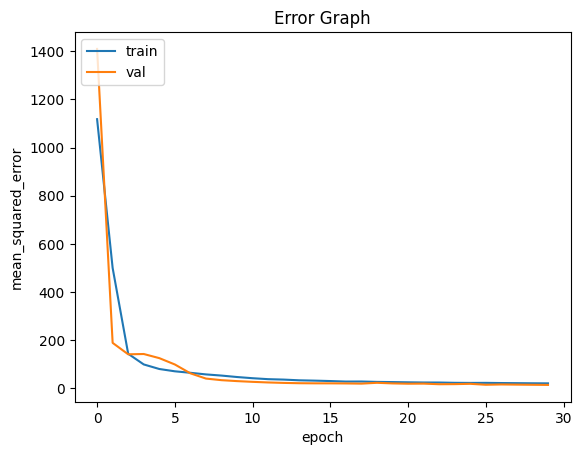

In [52]:
plot_losses(history, loss)

In [53]:
scores = model.evaluate(x_test, y_test, verbose = 0)

print('Mean Squared Error : ', scores[0])

Mean Squared Error :  11.753859519958496


110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


[]

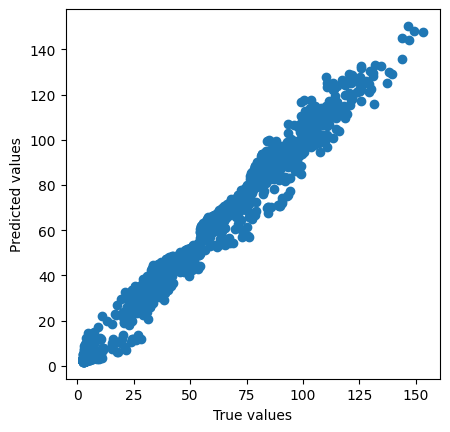

In [55]:
y_pred = model.predict(x_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.plot()

In [56]:
from sklearn.metrics import r2_score

print('r2 score: ', r2_score(y_test, y_pred))

r2 score:  0.9894719621386964


### 2.7 Exportar y guardar el Modelo

Por último, una vez entrenado nuestro modelo es importante guardarlo, para esto utilizaremos la función `save_model` de keras

In [57]:
model.save('steel_ind_regression.keras')

Para la entrega de la tarea, el modelo creado tiene que ser subido junto al jupyter notebook completado al github, ya sea en .keras o en un archivo .zip, el modelo será cargado y evaluado para comprobar su correcto funcionamiento, se recomienda probar el guardar y cargar el modelo en el mismo notebook para verificar que no hayan errores.